<a href="https://colab.research.google.com/github/omarelansary/Breast_Cancer_Prediction_Machine_Learning/blob/main/machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install pandas-profiling

In [ ]:
# all imports here 

import pandas as pd
import numpy as np
#from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt   # needed for visualization
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split #for dividing data into train and test 
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
import statsmodels.api as sm
import sklearn.linear_model as skl_lm
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import mean_squared_error


In [ ]:

# df = pd.read_csv('data.csv')
# print("Total data points",df.shape[0])
# print("Total number of features(as number of columns) are ", 
# df.shape[1])
def dataframe():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
    names = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst','Unnamed: 32']
    df = pd.read_csv(url, names=names)
    # df=pd.read_csv("data.csv") #this will require us to import the file at each runtime
    #print(df)                                #here we uploaded the excel file to read the data from it 
                                                 #da zi ely mwgood fl excel file 
    return df
df=dataframe()    
print(df.T)
#df.describe()

                              0         1         2         3         4    \
id                         842302    842517  84300903  84348301  84358402   
diagnosis                       M         M         M         M         M   
radius_mean                 17.99     20.57     19.69     11.42     20.29   
texture_mean                10.38     17.77     21.25     20.38     14.34   
perimeter_mean              122.8     132.9     130.0     77.58     135.1   
area_mean                  1001.0    1326.0    1203.0     386.1    1297.0   
smoothness_mean            0.1184   0.08474    0.1096    0.1425    0.1003   
compactness_mean           0.2776   0.07864    0.1599    0.2839    0.1328   
concavity_mean             0.3001    0.0869    0.1974    0.2414     0.198   
concave_points_mean        0.1471   0.07017    0.1279    0.1052    0.1043   
symmetry_mean              0.2419    0.1812    0.2069    0.2597    0.1809   
fractal_dimension_mean    0.07871   0.05667   0.05999   0.09744   0.05883   

In [ ]:
#prof = ProfileReport(df)
#prof.to_file(output_file='output.html') #uncomment if you dont have the report downloaded

In [ ]:
# NO catagorical features in the data set
df_new = df.iloc[:, 2:]
Cont = pd.DataFrame(columns=['Feature','Count','Miss %','card.','min.','1st Qrt','Mean','Median','3rd Qrt','Max.', 'Std. Dev.'])
Cont['Feature']=list(df_new.columns.values)

for (index, colname) in enumerate(df_new):
    Cont.at[index,'Count']= len(df_new[colname])
    Cont.at[index,'Miss %']= df_new[colname].isna().sum()
    Cont.at[index,'card.']= df_new[colname].nunique()
    Cont.at[index,'min.']= df_new[colname].min()
    Cont.at[index,'1st Qrt']= df_new[colname].quantile(0.25)
    Cont.at[index,'Mean']= df_new[colname].mean()
    Cont.at[index,'Median']= df_new[colname].median()
    Cont.at[index,'3rd Qrt']= df_new[colname].quantile(0.75)
    Cont.at[index,'Max.']= df_new[colname].max()
    Cont.at[index,'Std. Dev.']= df_new[colname].std()

Cont


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,Feature,Count,Miss %,card.,min.,1st Qrt,Mean,Median,3rd Qrt,Max.,Std. Dev.
0,radius_mean,569,0,456,6.981,11.7,14.127292,13.37,15.78,28.11,3.524049
1,texture_mean,569,0,479,9.71,16.17,19.289649,18.84,21.8,39.28,4.301036
2,perimeter_mean,569,0,522,43.79,75.17,91.969033,86.24,104.1,188.5,24.298981
3,area_mean,569,0,539,143.5,420.3,654.889104,551.1,782.7,2501.0,351.914129
4,smoothness_mean,569,0,474,0.05263,0.08637,0.09636,0.09587,0.1053,0.1634,0.014064
5,compactness_mean,569,0,537,0.01938,0.06492,0.104341,0.09263,0.1304,0.3454,0.052813
6,concavity_mean,569,0,537,0.0,0.02956,0.088799,0.06154,0.1307,0.4268,0.07972
7,concave_points_mean,569,0,542,0.0,0.02031,0.048919,0.0335,0.074,0.2012,0.038803
8,symmetry_mean,569,0,432,0.106,0.1619,0.181162,0.1792,0.1957,0.304,0.027414
9,fractal_dimension_mean,569,0,499,0.04996,0.0577,0.062798,0.06154,0.06612,0.09744,0.00706


['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']


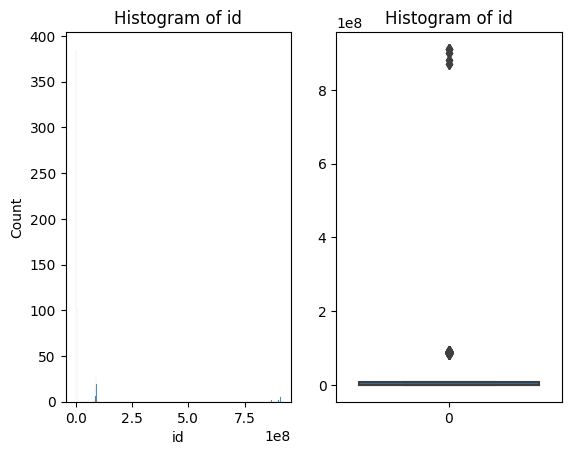

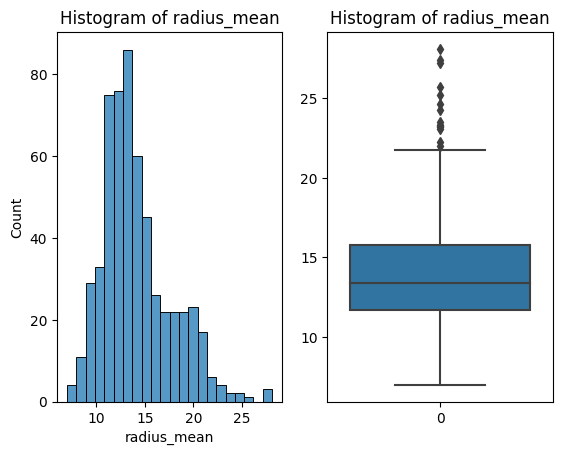

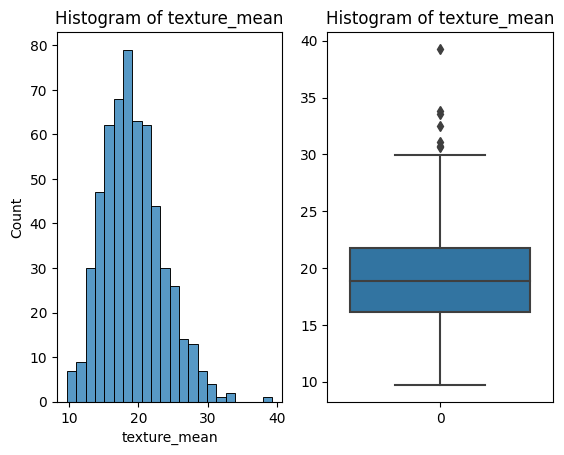

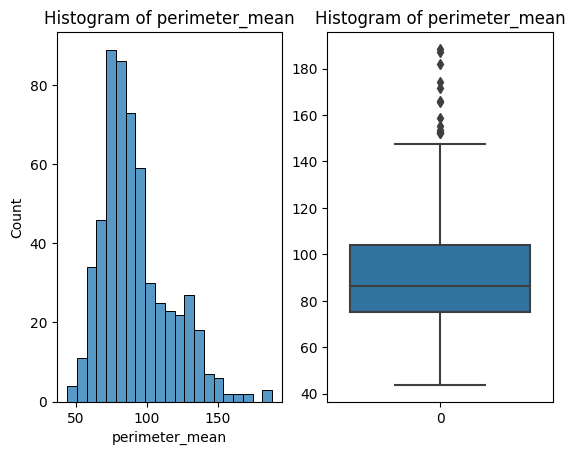

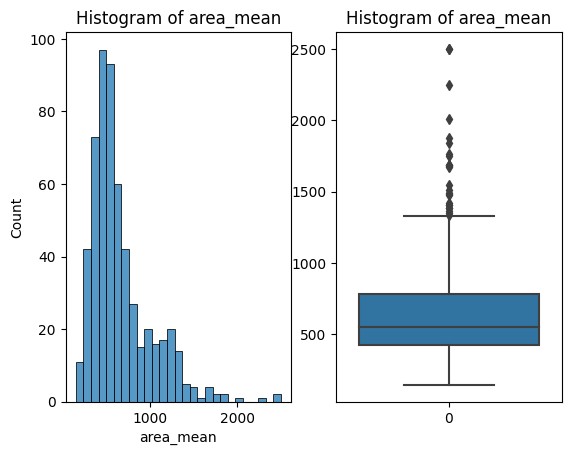

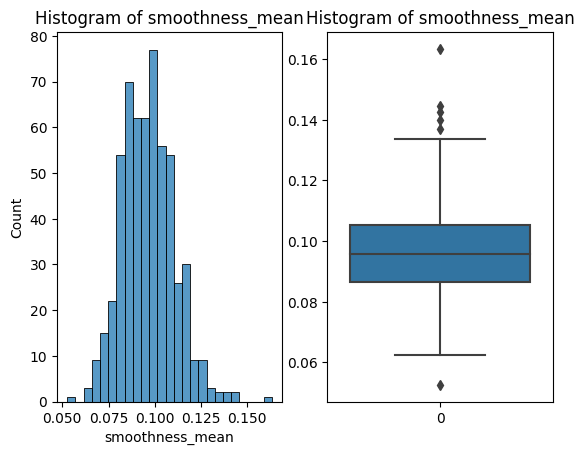

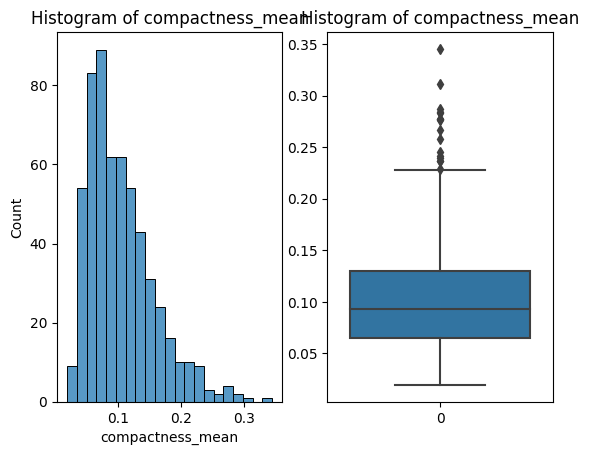

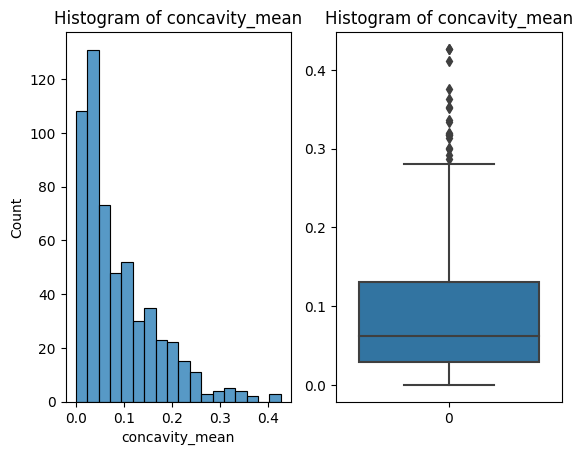

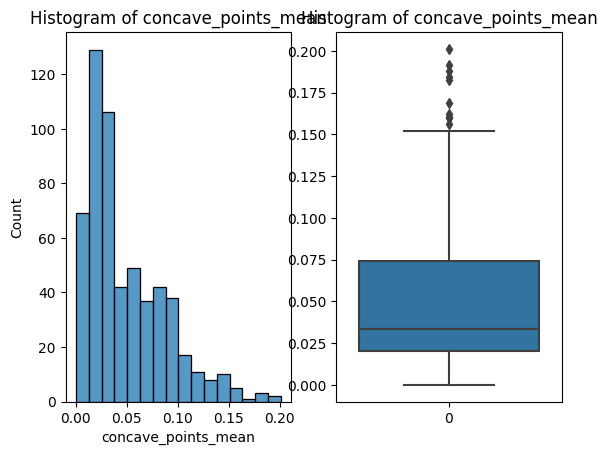

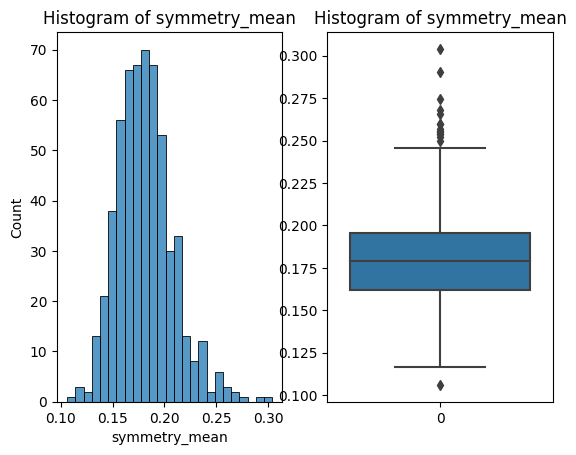

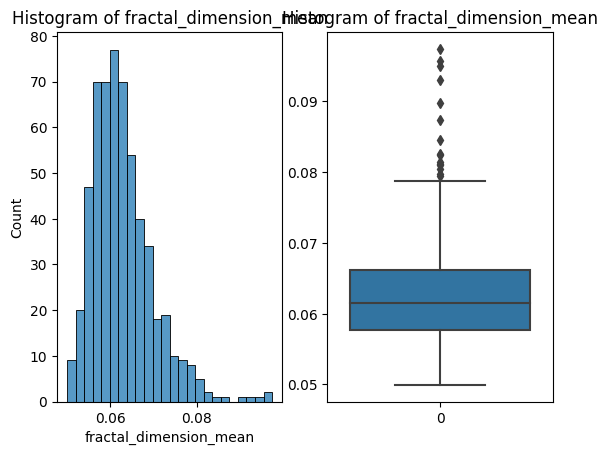

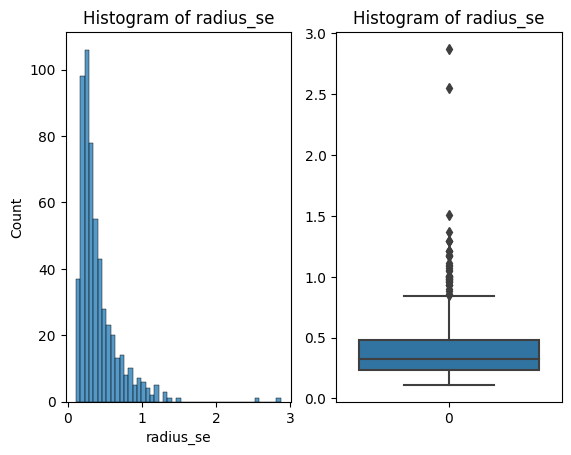

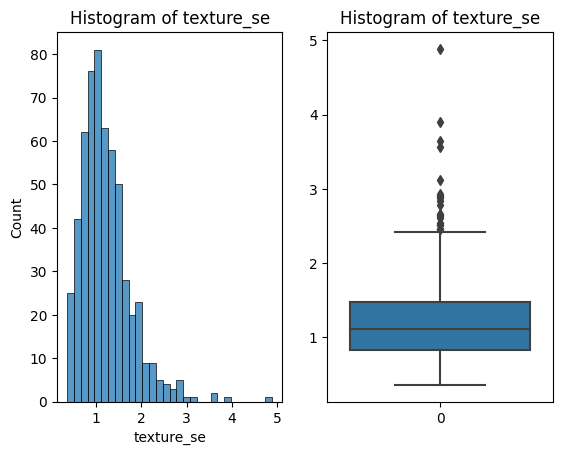

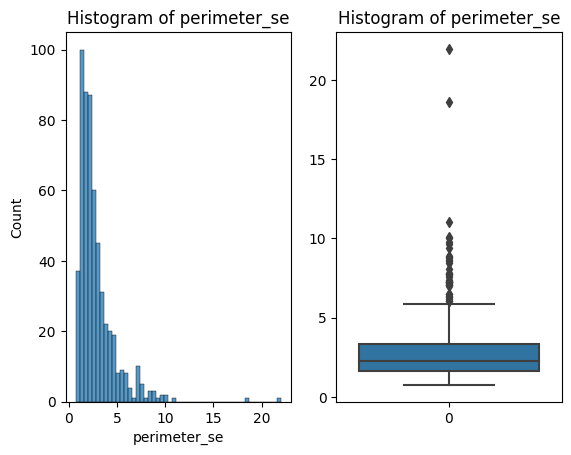

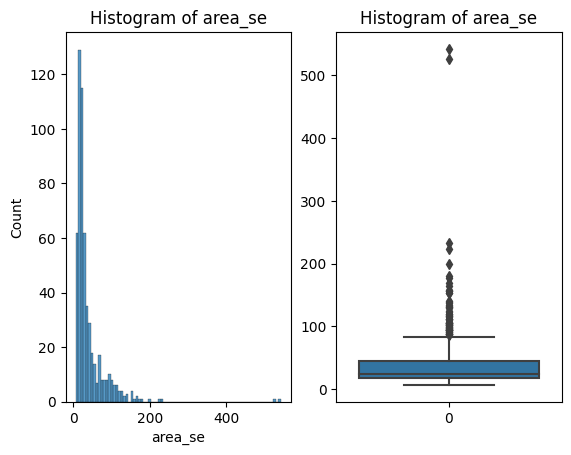

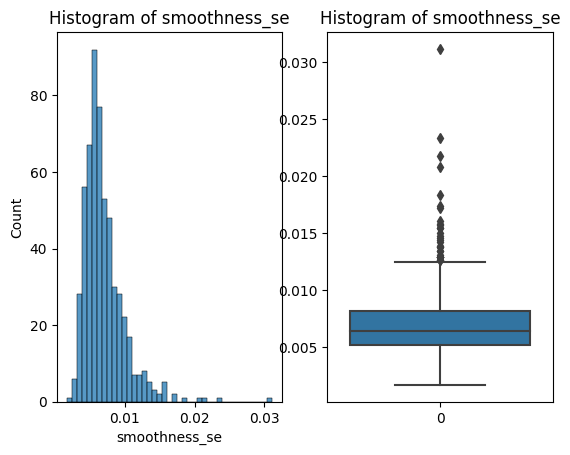

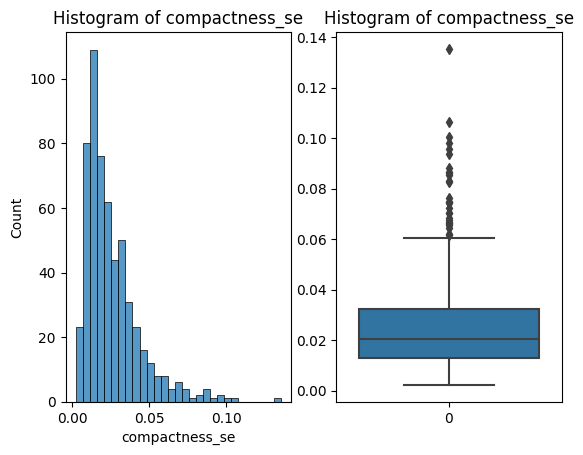

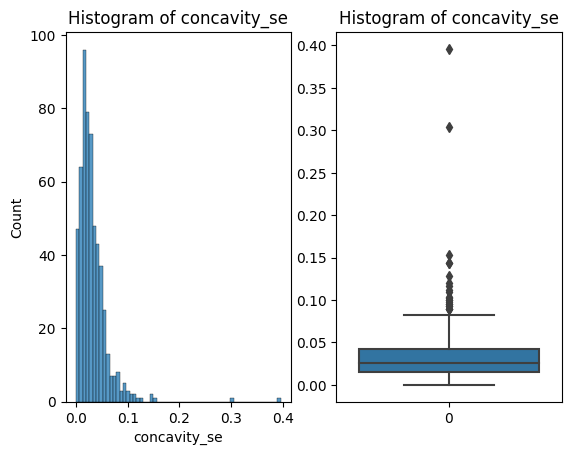

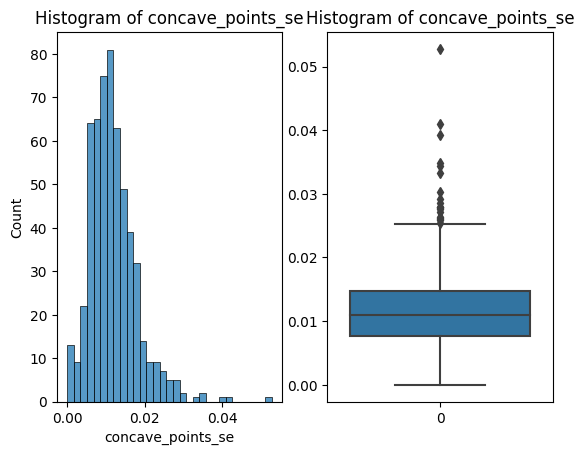

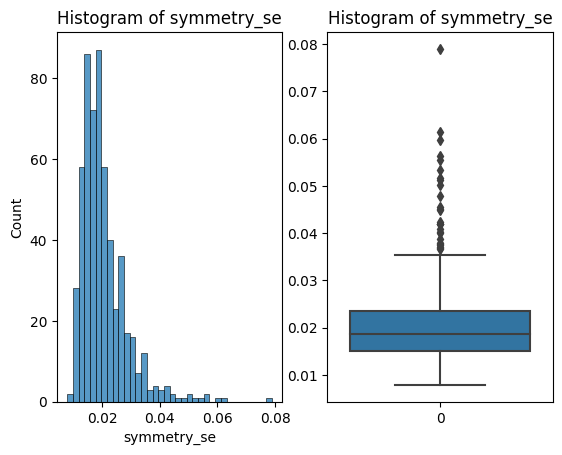

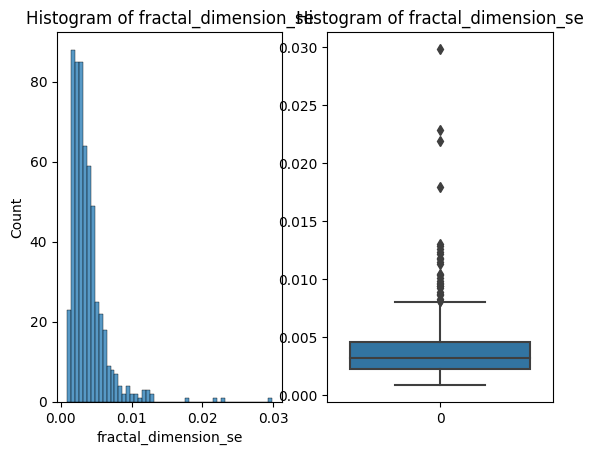

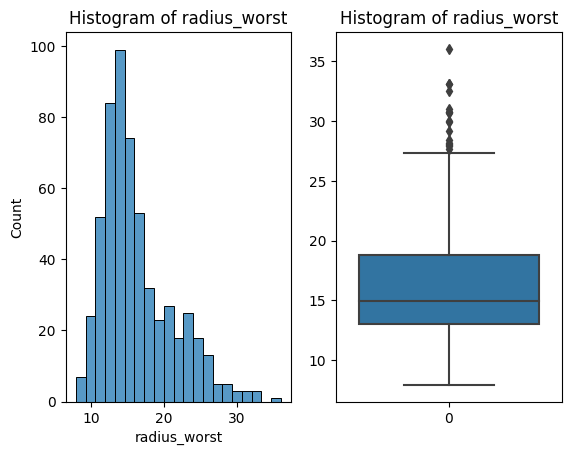

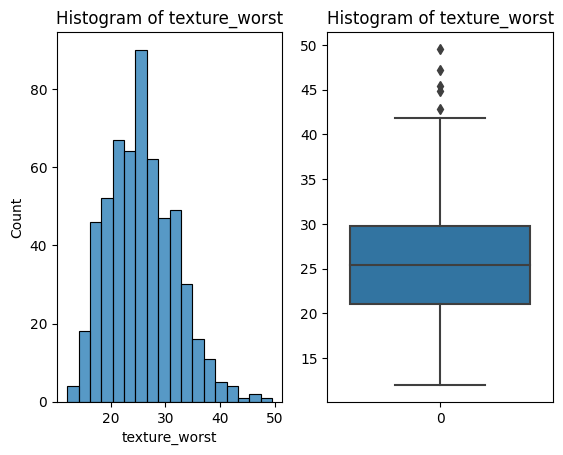

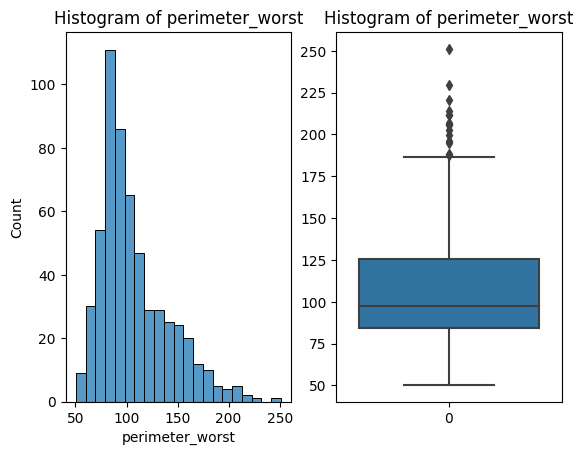

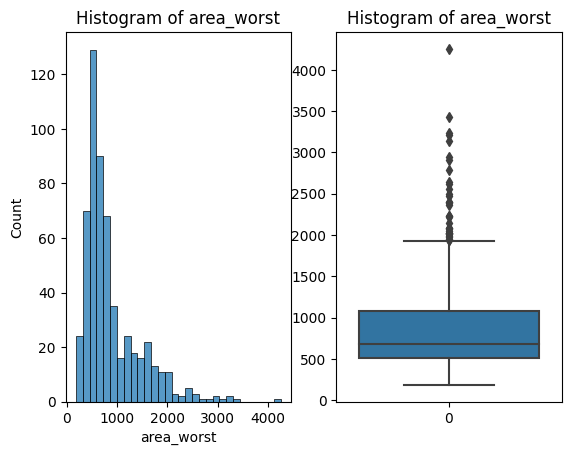

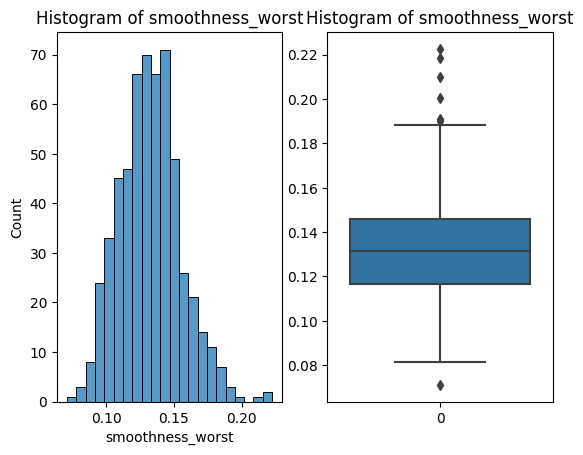

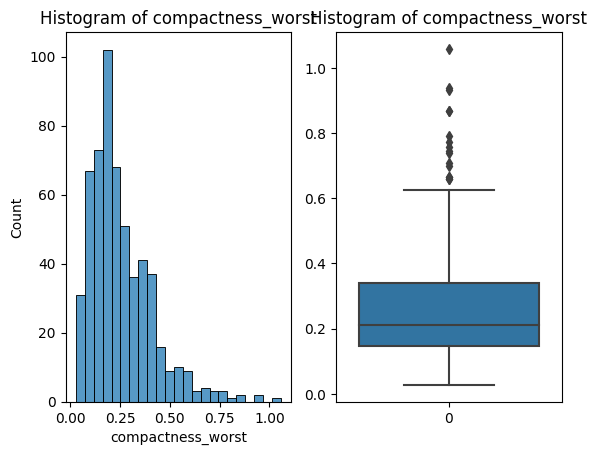

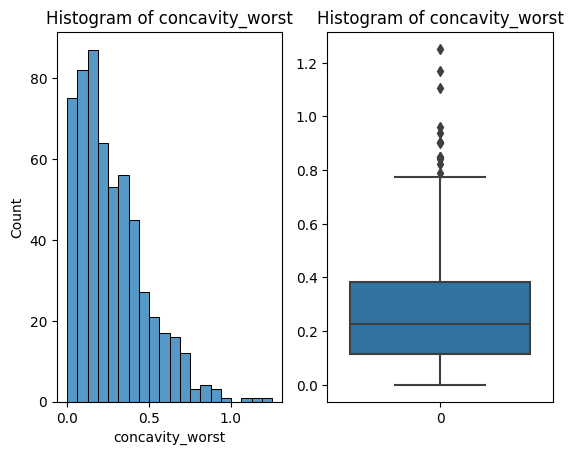

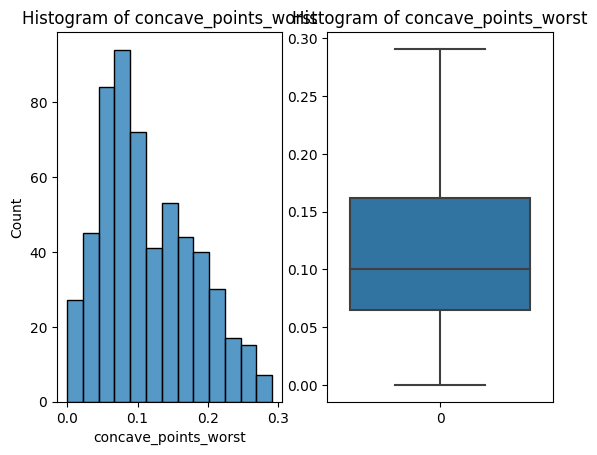

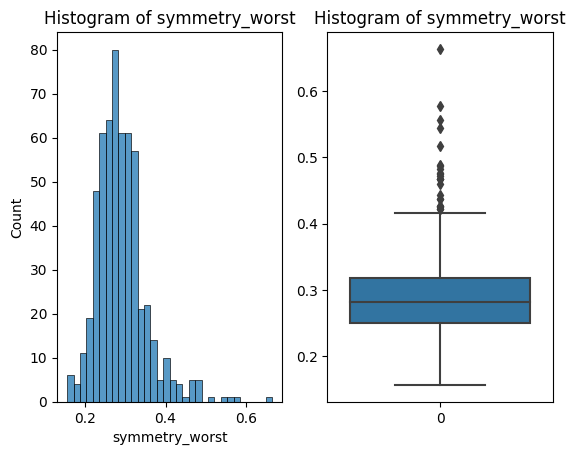

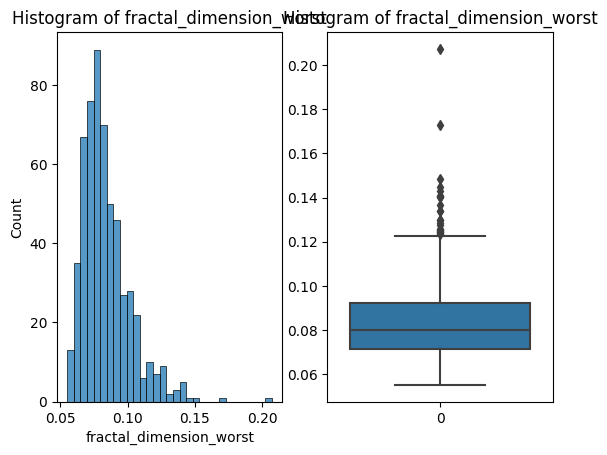

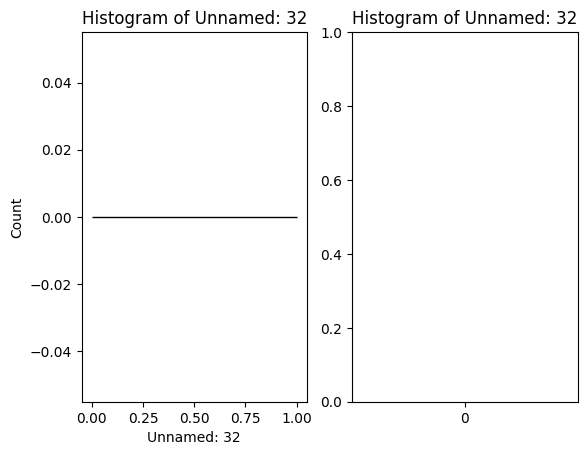

In [ ]:
cont_df = df.copy()
del cont_df['diagnosis']
cont_features=list(cont_df.columns)
print(cont_features)

for i in cont_features:
  fig, axs = plt.subplots(ncols=2)
  sns.histplot(data=cont_df[i], kde =False,ax=axs[0]).set_title("Histogram of " +str(i))
  sns.boxplot(data=cont_df[i], ax=axs[1]).set_title("Histogram of " +str(i))
  plt.show ()

From the data quality report its observed that there are some missing values, no irregular cardinality and some outliers.

In [ ]:
#Handeling 
#for missing values 
#deleting unnamed: 32 feature since it has a missing values percentage of more than 60 so it will be completely removed
del df['Unnamed: 32']
#handleing outliers (clamp transformation using IQR)
features_df = df.copy()
del features_df['diagnosis']
for i in list(features_df.columns):
  Q1 = features_df[i].quantile(0.25)
  Q3 = features_df[i].quantile(0.75)
  IQR = Q3 - Q1
  upper=Q3+1.5*IQR
  features_df.loc[features_df[i] >upper] = upper
  print('upper bound',upper)

  #Below Lower bound
  lower=Q1-1.5*IQR
  features_df.loc[features_df[i] < lower] = lower
  print('Lower Bound:',lower)


upper bound 20728995.5
Lower Bound: -11046648.5
upper bound 29.089999999999996
Lower Bound: 1.570000000000002
upper bound 35.005
Lower Bound: 5.524999999999997
upper bound 144.19
Lower Bound: 21.469999999999985
upper bound 1217.35
Lower Bound: -229.44999999999993
upper bound 0.16216999999999998
Lower Bound: 0.043050000000000026
upper bound 0.3031999999999999
Lower Bound: -0.07287999999999996
upper bound 0.35526499999999994
Lower Bound: -0.15965499999999996
upper bound 0.21517
Lower Bound: -0.09298999999999999
upper bound 0.23224500000000003
Lower Bound: 0.12012499999999994
upper bound 0.12251000000000002
Lower Bound: 0.02114999999999998
upper bound 0.7267350000000001
Lower Bound: -0.24002500000000004
upper bound 2.7708000000000004
Lower Bound: -1.082
upper bound 4.9773975
Lower Bound: -1.8236624999999997
upper bound 62.509897499999994
Lower Bound: -36.3431625
upper bound 0.29786300000000004
Lower Bound: -0.16974500000000003
upper bound 0.28433
Lower Bound: -0.14719000000000002
upper bo

In [ ]:
df_new2 = df['diagnosis']

In [ ]:
#Replace M with 1 and Begnin with 0 (else 0)
print("Malignant = 1, Benign = 0")                                              # to know the cardinality of our features
df["diagnosis"]= df["diagnosis"].map(lambda row: 1 if row=='M' else 0)          # nfs el ntayg ely fl link ely mariam gybah elhamdulllah
df.head()
print("The unique number of data values are")
df.nunique()

Malignant = 1, Benign = 0
The unique number of data values are


id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave_points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave_points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave_points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: i

0.37258347978910367
Total number of data points =   569
Malignant (diagnosis =1) = 37.3%
Benign (diagnosis =0)= 62.7%


<Axes: title={'center': 'Malignant (1) vs Benign Data(0) points'}, xlabel='diagnosis', ylabel='Number of data points'>

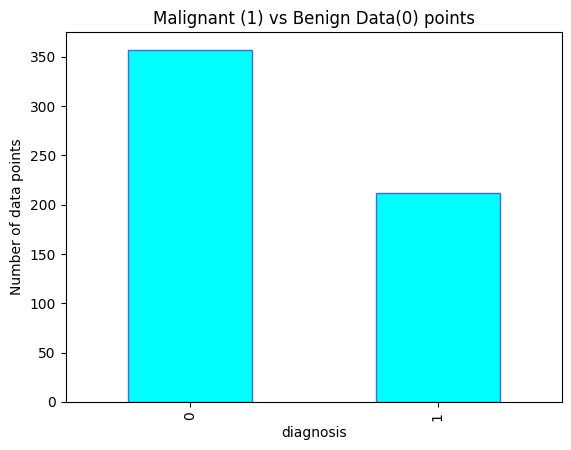

In [ ]:
df["diagnosis"].value_counts()
print(df["diagnosis"].mean())
#Plot the number of data points with mailgnant and benign as their diagnosis                                      
print("Total number of data points =  ", len(df))
print("Malignant (diagnosis =1) = {}%".format(round(df["diagnosis"].mean(),3)*100))
                             
print("Benign (diagnosis =0)= {}%".format((1-round(df["diagnosis"].mean(),3))*100))
df.groupby("diagnosis")['id'].count().plot.bar(ylabel = "Number of data points", title = "Malignant (1) vs Benign Data(0) points", color = 'cyan', edgecolor = "royalblue")

Unnamed should be removed and id feature 

In [ ]:
#feature selection and extraction as the id will not be used .
#df.drop(['Unnamed: 32', 'id'], axis = 1)
del df['id'] 
df.nunique()

diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave_points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave_points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave_points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64

In [ ]:
#Check for null values
null_values = df.isnull().values.any()
if null_values == True:
    print("There are some missing values in data")               # here we made a check if there is any missing data 
                                                                  # and we found missing data msh 3arf ezay 
else:
    print("There are no missing values in the dataset")
#df.isna().sum()

There are no missing values in the dataset


<Axes: >

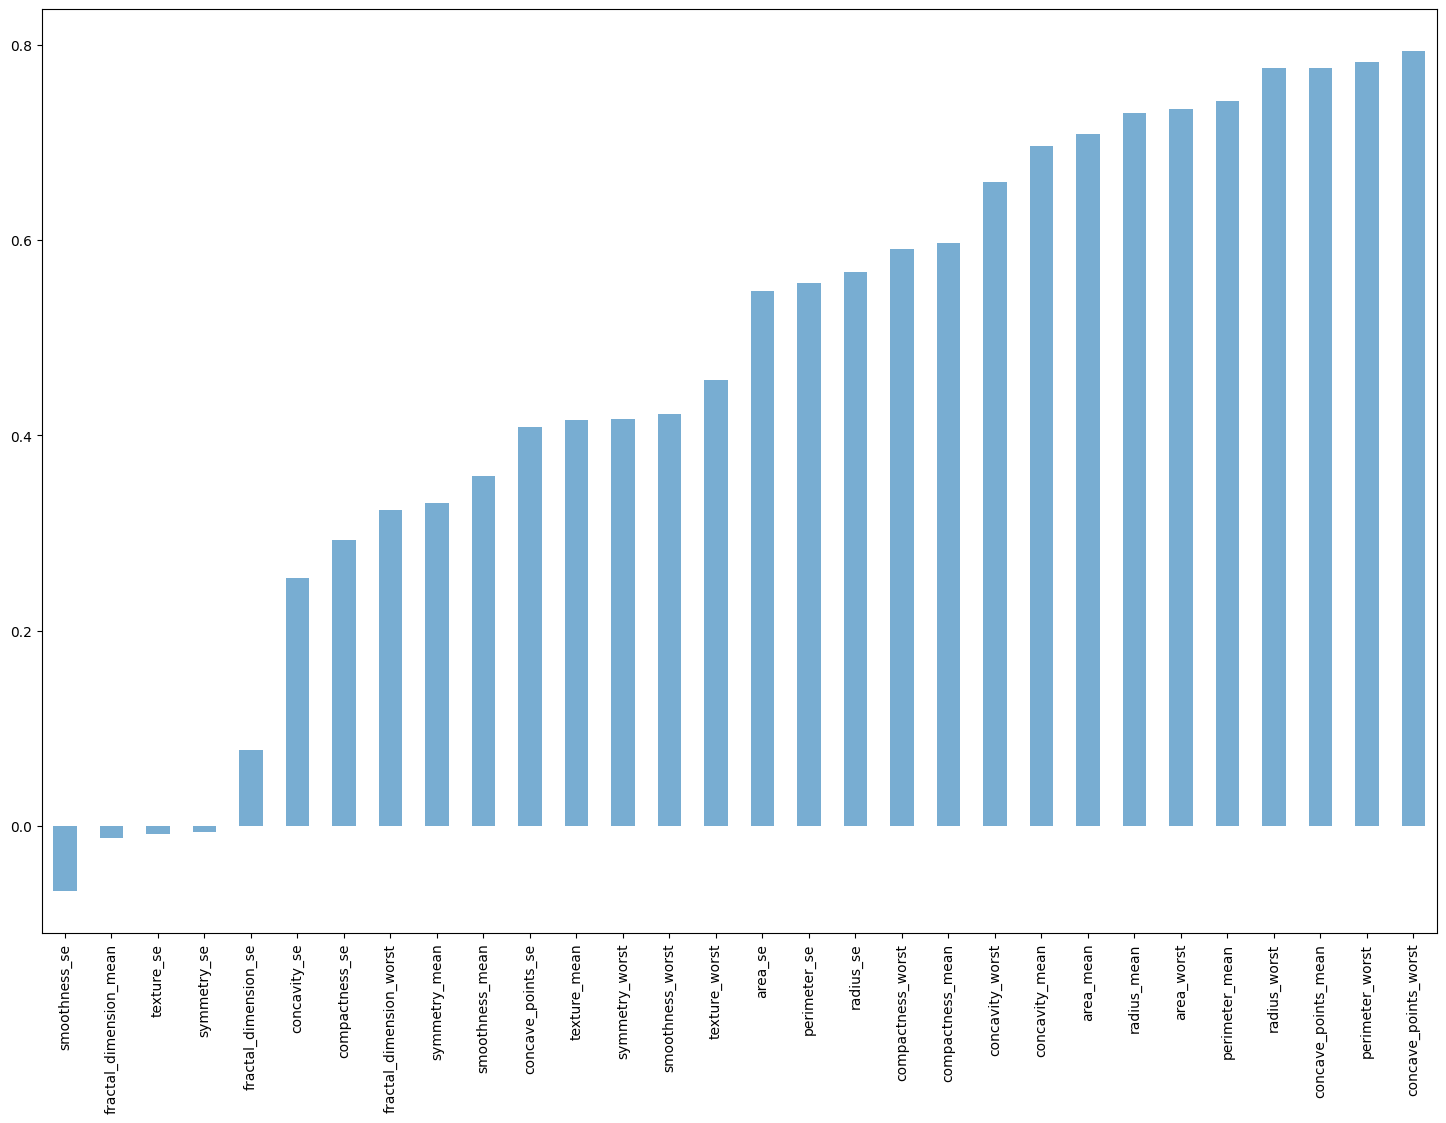

In [ ]:
#Observe correlation to the diagnosis
f, ax = plt.subplots(figsize=(18, 12))
tst = df.corr()['diagnosis'].copy()
tst = tst.drop('diagnosis')
tst.sort_values(inplace=True)
tst.plot(kind='bar', alpha=0.6)

we can see that the data is divided into 3 main categories (mean, worst and se)

In [ ]:
features_mean = df.columns[1:11]
features_se = df.columns[11:21]
features_worst = df.columns[21:]

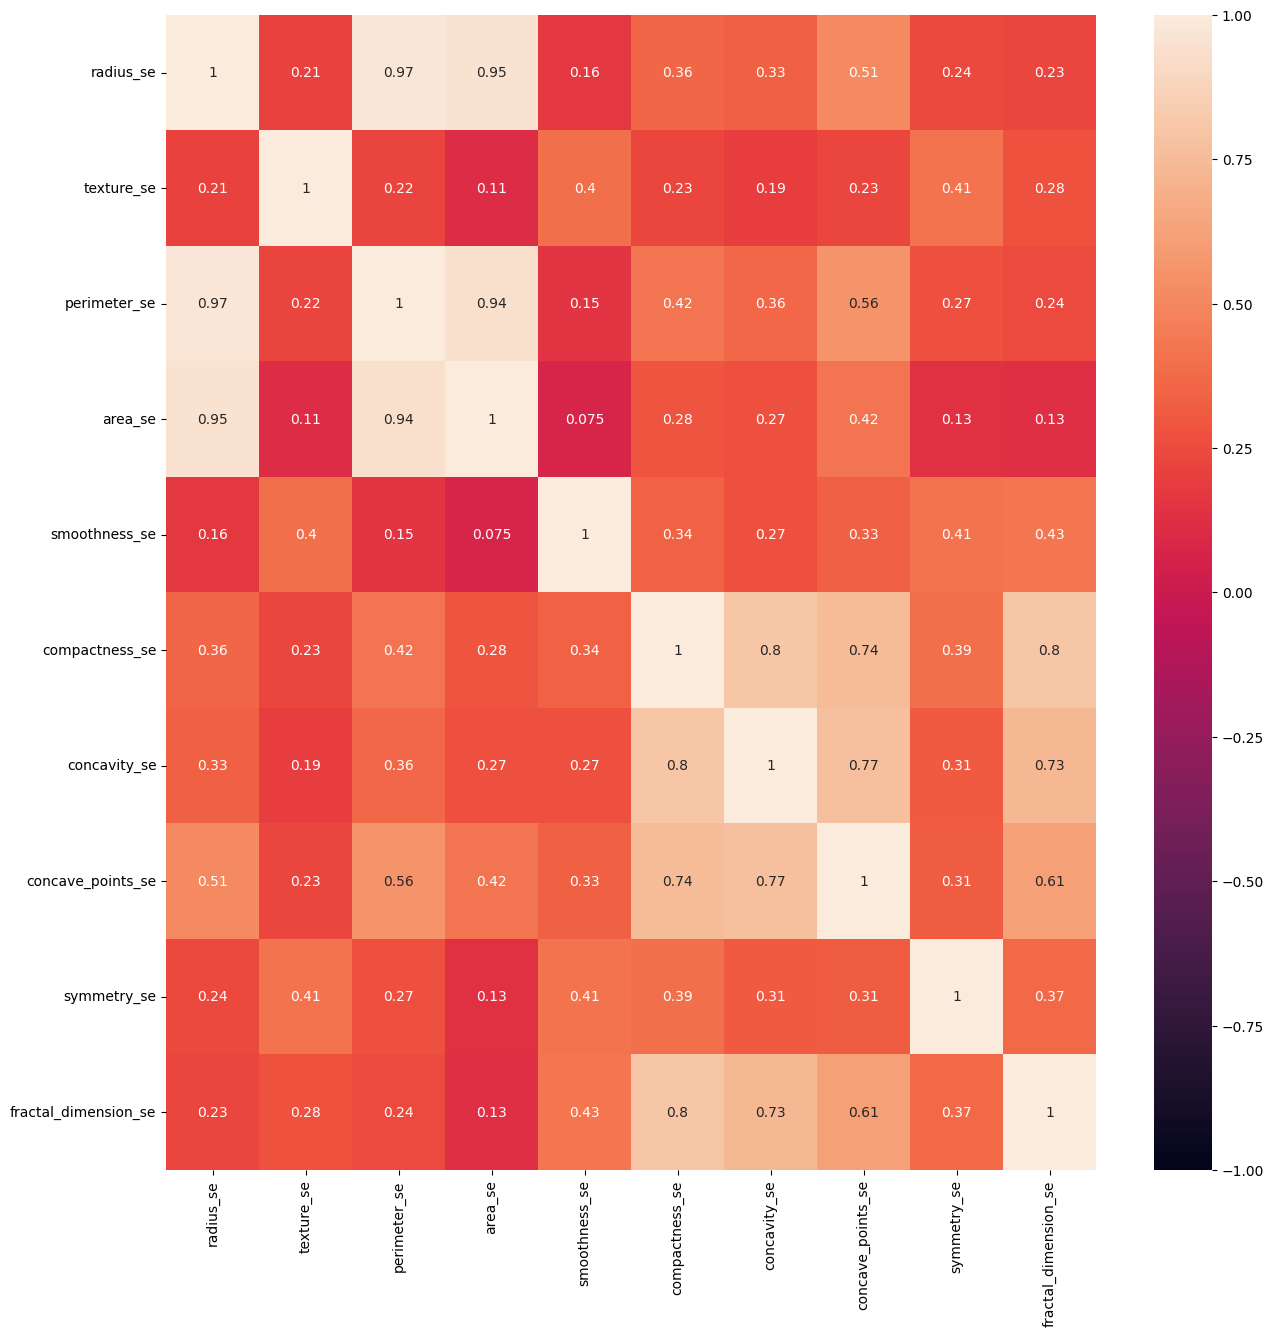

In [ ]:
plt.figure(figsize =(15,15))
sns.heatmap(df[features_se].corr(),vmin=-1, vmax=1, annot=True )
plt.show()

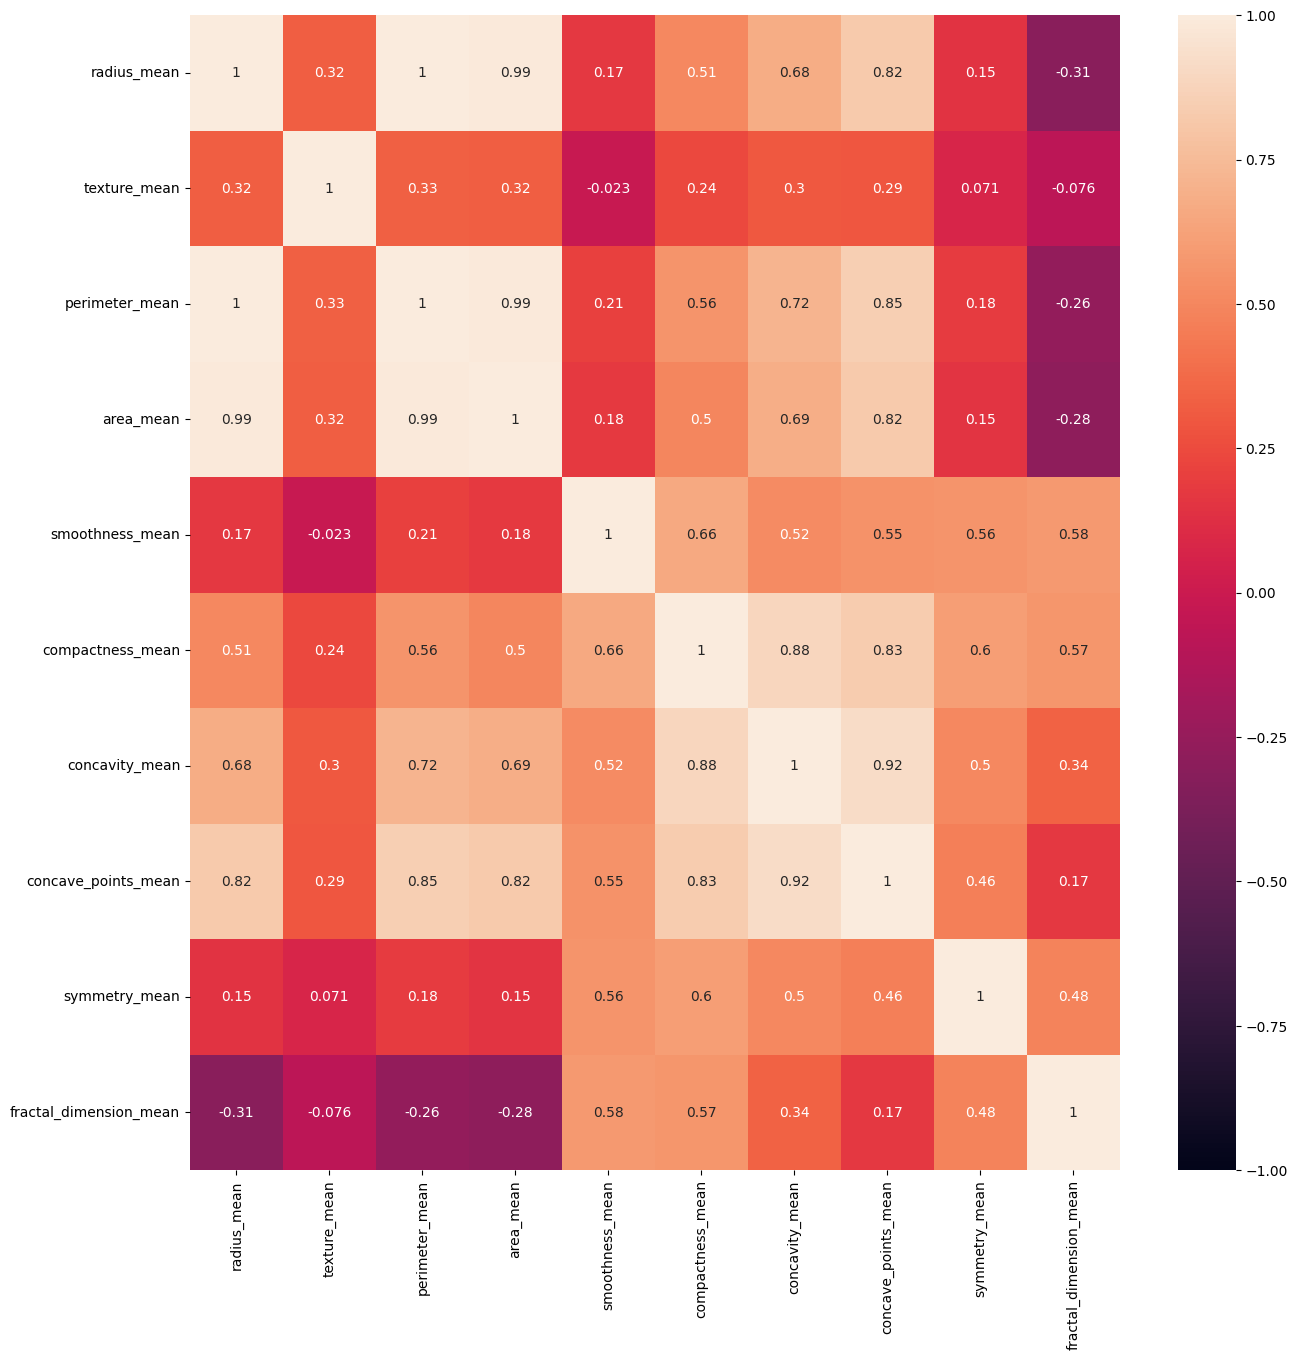

In [ ]:
plt.figure(figsize =(15,15))
sns.heatmap(df[features_mean].corr(),vmin=-1, vmax=1, annot=True )
plt.show()

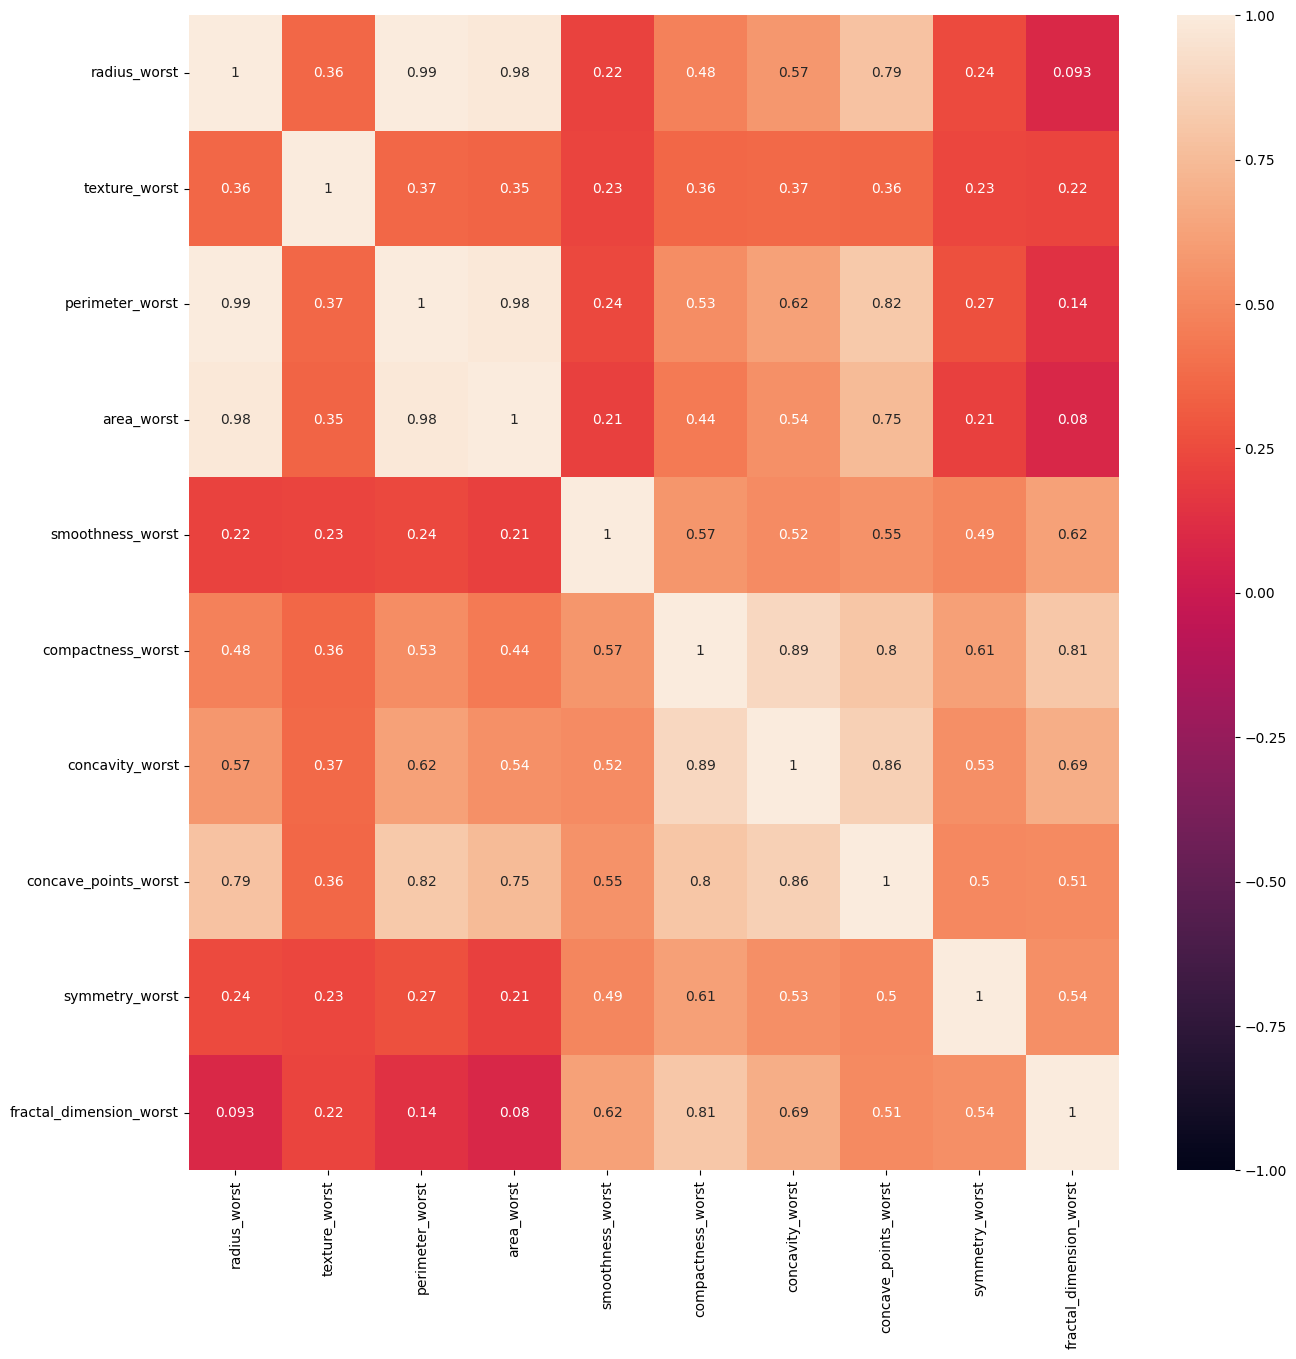

In [ ]:
plt.figure(figsize =(15,15))
sns.heatmap(df[features_worst].corr(),vmin=-1, vmax=1, annot=True )
plt.show()

visualizing the distribution of the data among mean features

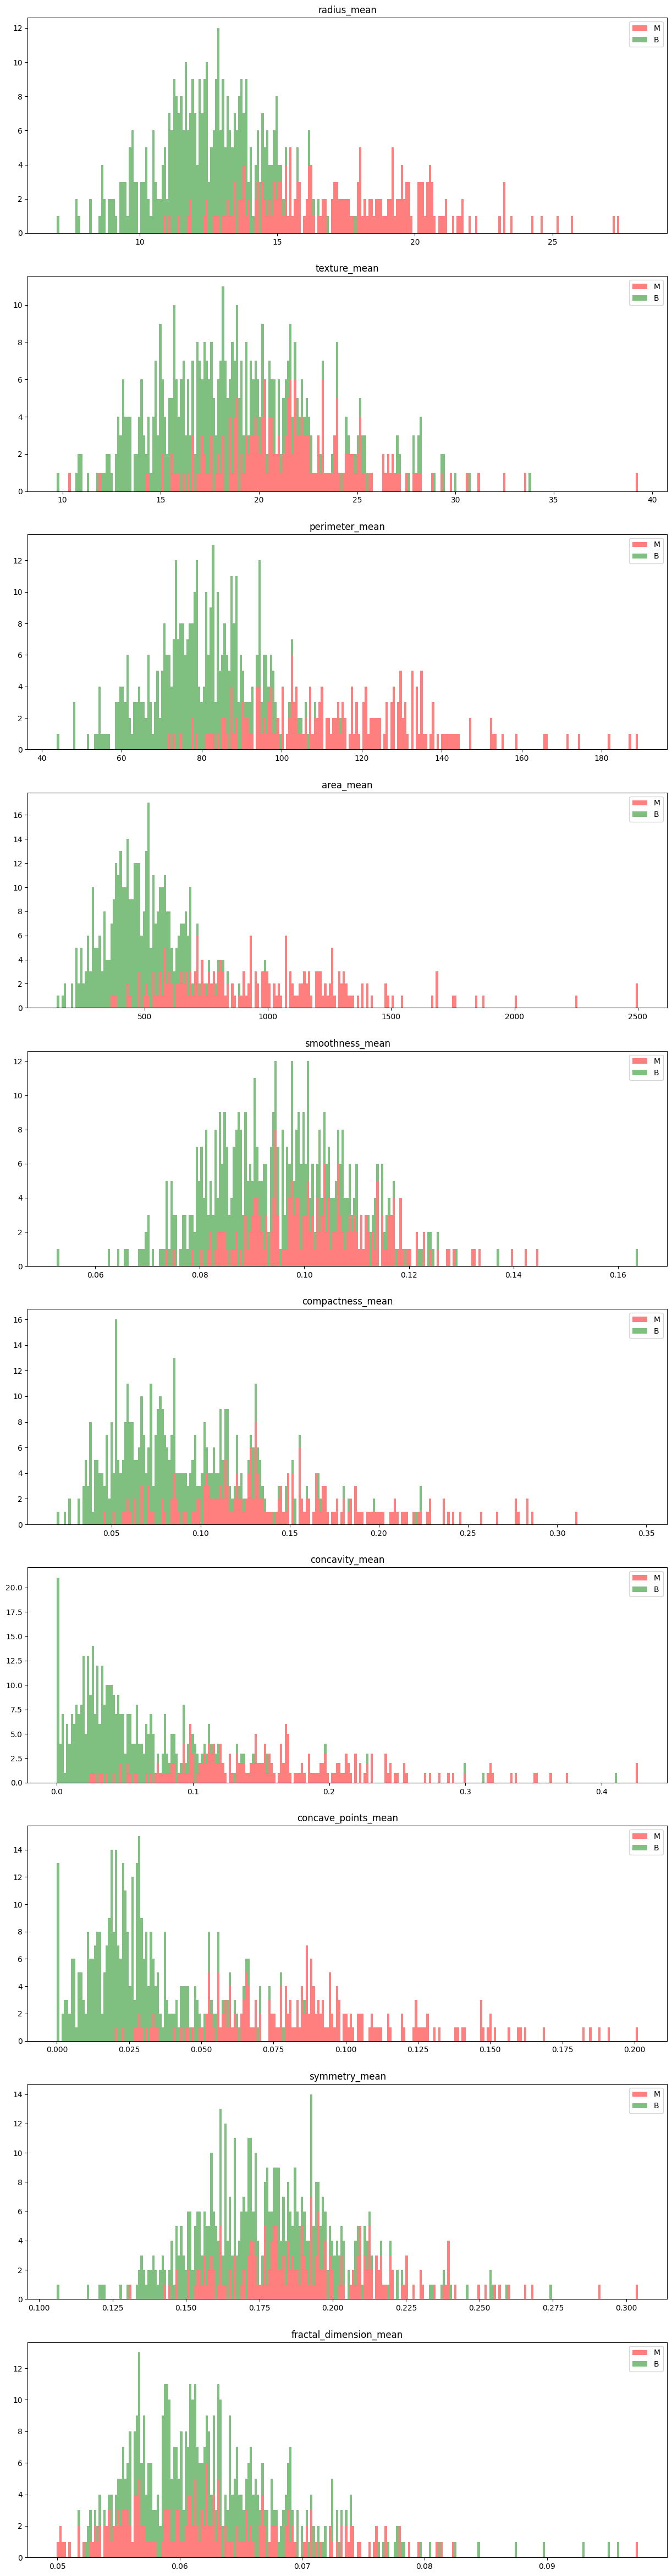

In [ ]:
# Splitting the dataset into malignant and benign.
dataMalignant=df[df['diagnosis'] ==1]
dataBenign=df[df['diagnosis'] ==0]
fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(15,60))
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(df[features_mean[idx]]) - min(df[features_mean[idx]]))/250
    ax.hist([dataMalignant[features_mean[idx]],dataBenign[features_mean[idx]]], bins=np.arange(min(df[features_mean[idx]]), max(df[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True,  label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.show()

In [ ]:
#Correlation Table
corr = df.corr()
corr = (corr)

corr

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave_points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


Feature Selection

In [ ]:
k = 10
#X = df.drop('diagnosis')
X= df.copy(deep=True)
del X['diagnosis']
y = df['diagnosis']
skb = SelectKBest(score_func=chi2, k=k)
X_new = skb.fit_transform(X, y)
feature_names = X.columns[skb.get_support()]
print(feature_names)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'perimeter_se', 'area_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst'],
      dtype='object')


<Figure size 3000x3000 with 0 Axes>

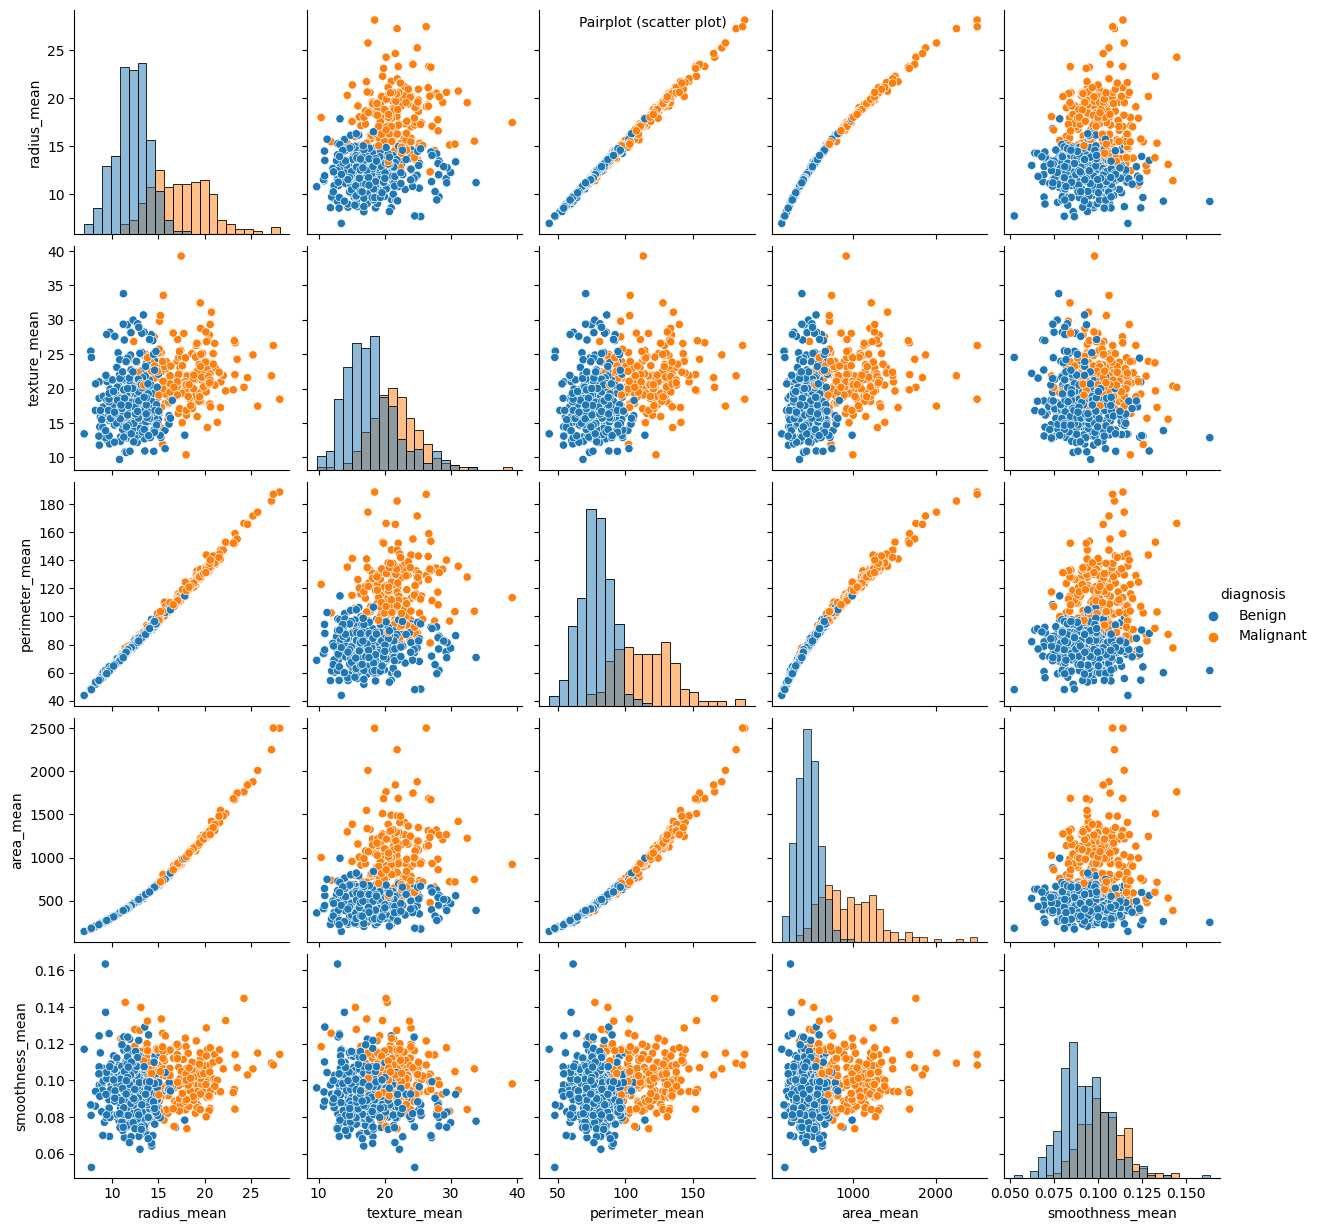

In [ ]:
plt.figure(figsize=(30,30))
points = df[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','diagnosis']]
ax = sns.pairplot(points, hue='diagnosis', diag_kind='hist')

# Change the legend labels
new_labels = ['Benign', 'Malignant']
for t, l in zip(ax._legend.texts, new_labels):
    t.set_text(l)

plt.suptitle('Pairplot (scatter plot)', fontsize=10)
plt.show()

Functions for standardization and Normalization if needed 

In [ ]:
def standardize(data):
    """Standardize a data to 0 mean and 1 std
    Return standardized data AND the scaler object
    """
    # YOUR CODE HERE
    object= StandardScaler()
    scale = object.fit_transform(data) 
    return scale

In [ ]:
def Normalize(x_data):
    x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data)).values
    return x   # This will return x data after being normalized 


Creating correlation matrix (sym) to be able to see the relation between different features as done in the paper. (To be more clear and easier to visualize than correlation table)

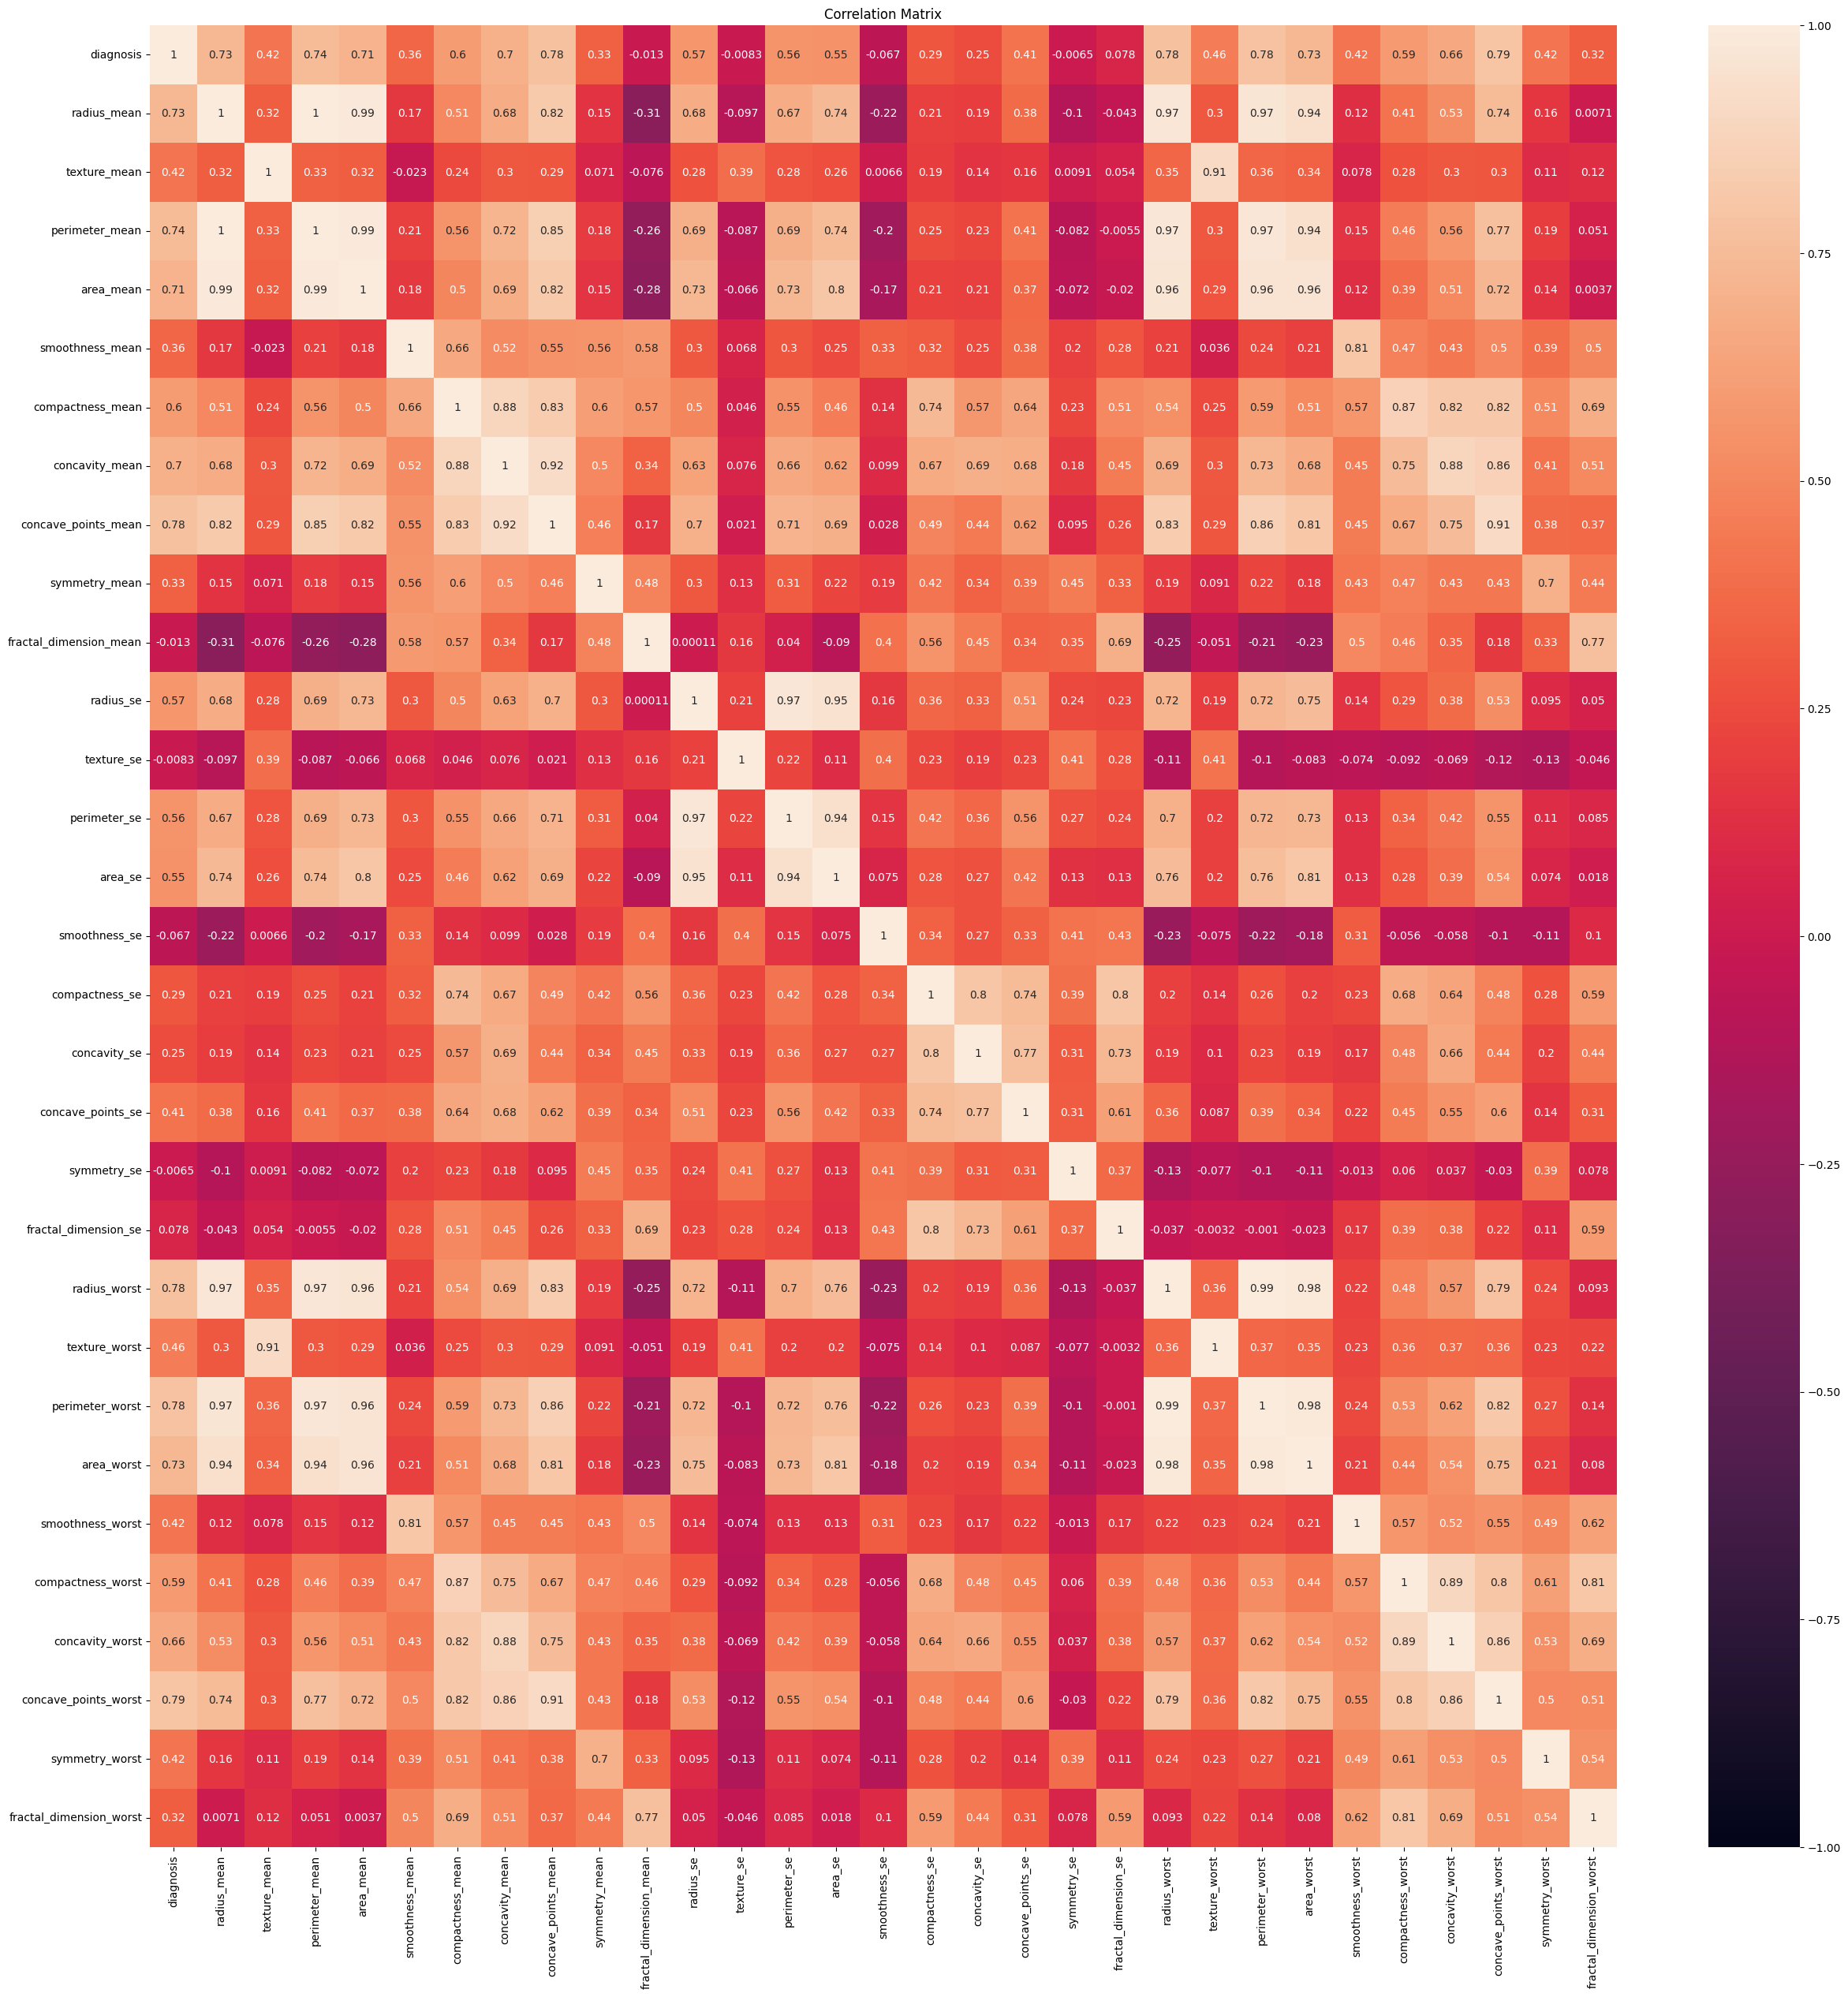

In [ ]:

plt.figure(figsize=(30,30))
ax = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
ax.set_title('Correlation Matrix')
plt.show()

Splitting data and Working on Models (logistic - KNN - forest - decision tree)

Using train_test_split from ski-learn, split X and y into training and test sets. With 80% training and 20% test.(same as the paper)

In [ ]:
# Using train_test_split, split X and y into training and test sets. With 80% training and 10% test.
# USE random_state=0
x = df.copy(deep=True)
del x['diagnosis']
x_train, x_test, y_train, y_test = train_test_split(
    x, df['diagnosis'], train_size = .80, test_size= .2, random_state =0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
 


(455, 30)
(114, 30)
(455,)
(114,)


In [ ]:

# scaler = StandardScaler()
# X_train = scaler.fit_transform(x_train)
# X_test = scaler.transform(x_test)



x_train = standardize(x_train)
x_test = standardize(x_test)
accuracy_dict = {}


In [ ]:
def analyze_roc(mod,X1,y1,X2,y2):
    ytrain_pred = mod.predict_proba(X1)
    ytest_pred = mod.predict_proba(X2)
    # Results have probabilities for results [0,1]

    roc_train = metrics.roc_curve(y1,ytrain_pred[:,1])
    roc_test = metrics.roc_curve(y2,ytest_pred[:,1])

    #roc_auc_train = metrics.roc_auc_score(y1,ytrain_pred[:,1])
    roc_auc_test = metrics.roc_auc_score(y2,ytest_pred[:,1])
    print(roc_auc_test)


    fig = plt.figure(1,figsize=[6,6])
    plt.plot(roc_train[0],roc_train[1],label='Test set',c='b')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

Logistic Regression

In [ ]:
param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],
    "penalty": ["l1", "l2"]
}

lr = LogisticRegression(random_state=0)

# Step 4: Train the model
lr.fit(x_train, y_train)

# Perform a grid search over the hyperparameters
grid_search = GridSearchCV(lr, param_grid, cv=10)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Train the model using the best hyperparameters
best_lr_model = LogisticRegression(random_state=0, **grid_search.best_params_)
best_lr_model.fit(x_train, y_train)

# Evaluate the model on the test set
y_pred_log = best_lr_model.predict(x_test)
# print("Accuracy:", metrics.accuracy_score(y_test, y_pred_log))
# print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_log))
# print("Classification report:\n", classification_report(y_test, y_pred_log))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best hyperparameters: {'C': 1, 'penalty': 'l2'}


In [ ]:
# import math
# model = LogisticRegression(C = 0.3,random_state=42)
# model.fit(x_train, y_train)
# y_pred_lr = model.predict(x_test) # predicting on test data
# accuracy_lr = accuracy_score(y_test,y_pred_lr) # accuarcy between actual test values and predicted values
# print("Accuracy on Test Data:",math.ceil(accuracy_lr*100)) # prints the accuracy score



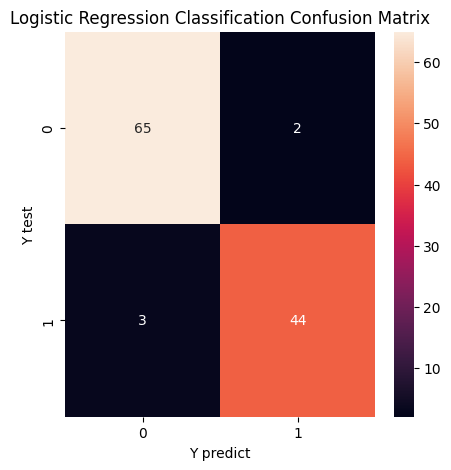

In [ ]:
# The confusion matrix

logreg_cm = confusion_matrix(y_test, y_pred_log)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(logreg_cm, annot=True, ax=ax)
plt.title('Logistic Regression Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [ ]:
confusion_matrix(y_test,y_pred_log)
lr_cm = confusion_matrix(y_test, y_pred_log)
lr_cm = pd.DataFrame(lr_cm, columns=["Benign", "Malignant"], index=["Benign","Malignant"])
print(lr_cm)
print(classification_report(y_test, y_pred_log))

           Benign  Malignant
Benign         65          2
Malignant       3         44
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        67
           1       0.96      0.94      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



0.9939663385201651


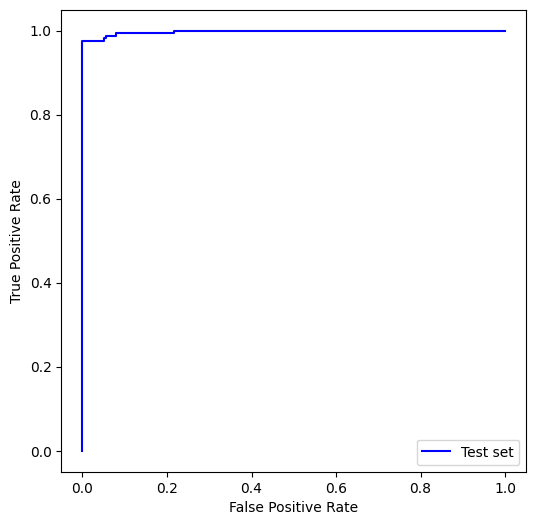

In [ ]:
analyze_roc(lr,x_train,y_train,x_test,y_test)

In [ ]:
score_logreg = best_lr_model.score(x_test, y_test)
accuracy_dict["logistic"] = score_logreg
print(score_logreg*100)
mse = mean_squared_error(y_test, y_pred_log)
print(f"Mean Squared Error: {mse}")

95.6140350877193
Mean Squared Error: 0.043859649122807015


In [ ]:

####Random Forest########

# assume 'X' is your dataframe with features and 'y' is your target variable

# create a random forest classifier object
rf = RandomForestClassifier(n_estimators=200, random_state=0)

# fit the random forest to the data
rf.fit(x, df['diagnosis'])

# extract feature importance
importances = pd.Series(rf.feature_importances_, index=x.columns)

# sort feature importance in descending order
importances_sorted = importances.sort_values(ascending=False)

# print the feature importance
print(importances_sorted)

concave_points_worst       0.136548
perimeter_worst            0.125654
radius_worst               0.123216
area_worst                 0.110714
concave_points_mean        0.093852
concavity_mean             0.059614
perimeter_mean             0.052046
area_mean                  0.037795
area_se                    0.037502
concavity_worst            0.032834
radius_mean                0.029050
texture_worst              0.019452
perimeter_se               0.016226
radius_se                  0.014527
smoothness_worst           0.013564
texture_mean               0.013498
compactness_worst          0.012948
symmetry_worst             0.010417
fractal_dimension_worst    0.007790
smoothness_mean            0.006706
compactness_mean           0.006519
concave_points_se          0.005980
fractal_dimension_se       0.005733
texture_se                 0.005099
concavity_se               0.004449
symmetry_mean              0.004309
smoothness_se              0.003920
symmetry_se                0

Here we made random forest selection to choose our features 
it returns an array of importance scores for each feature in the dataframe
and we are going to compare these results with the results we calculated from other algorithms

In [ ]:
#decision tree
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state=0)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred_tree = clf.predict(x_test)


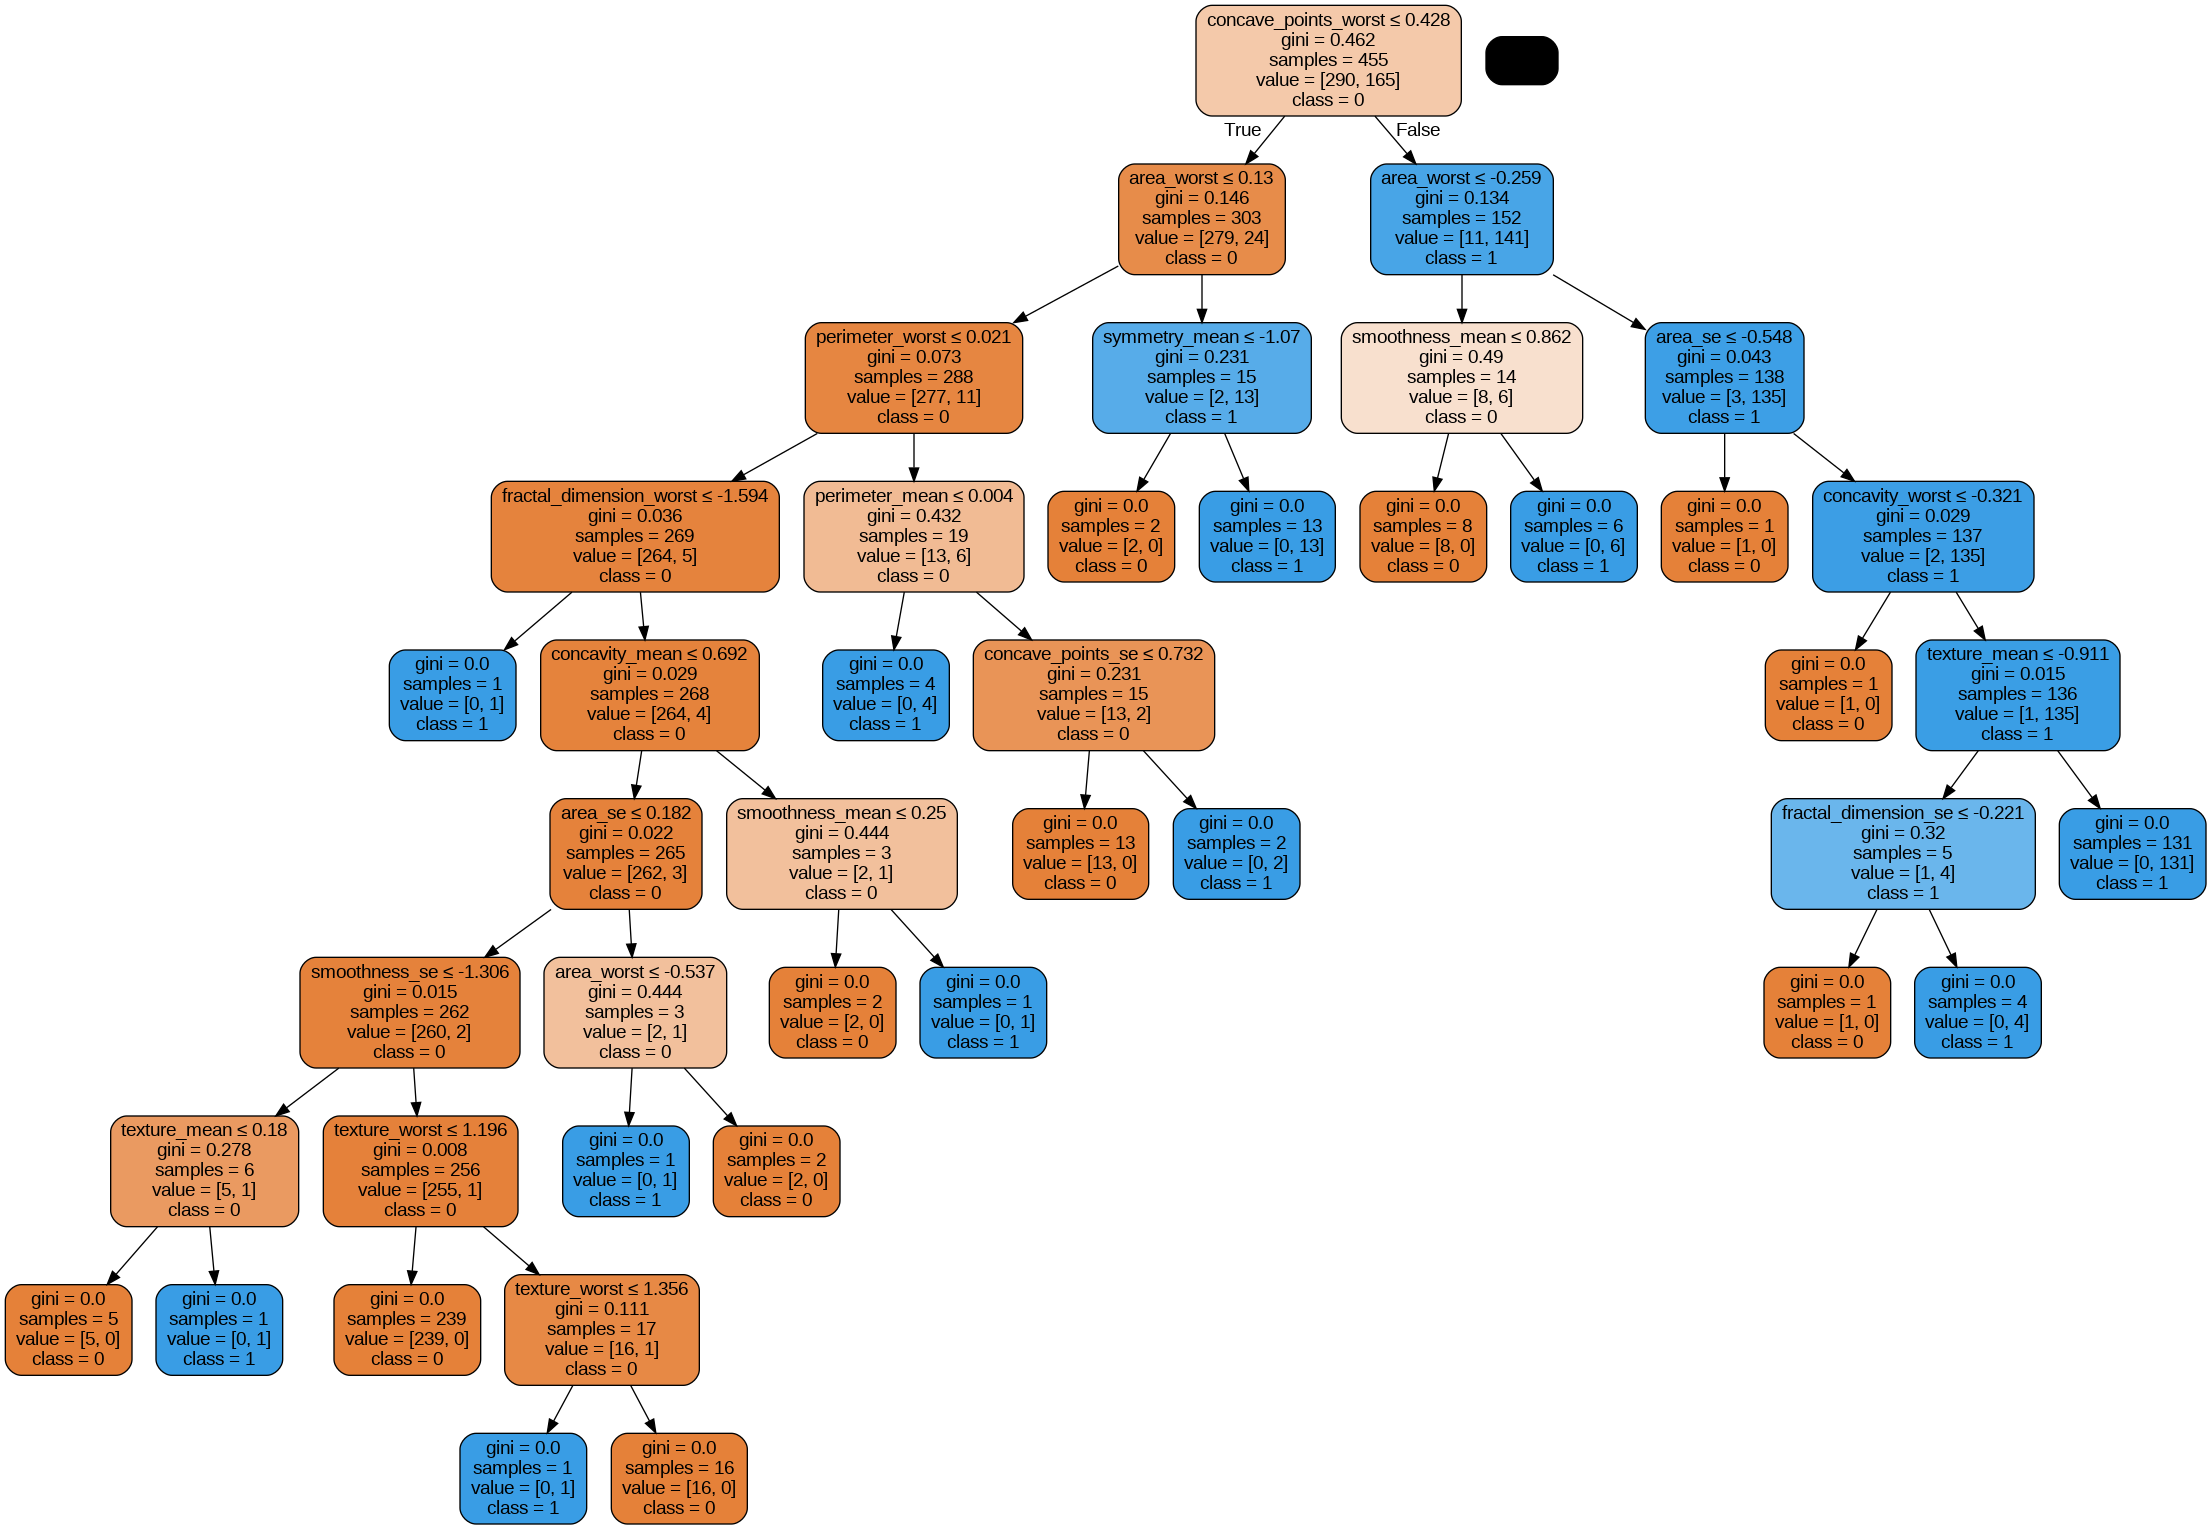

In [ ]:
#Visualizing the desicion tree
dot_data = StringIO()
features=list(x.columns)
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features ,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())





# # Define the hyperparameters to tune
# param_grid = {
#               "max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10],
#               }
# # Create a decision tree classifier
# dt = DecisionTreeClassifier(random_state=0)
# # Perform a grid search over the hyperparameters
# grid_search = GridSearchCV(dt, param_grid, cv=5)
# grid_search.fit(x_train, y_train)
# # Print the best hyperparameters
# print("Best hyperparameters:", grid_search.best_params_)
# # Train the model using the best hyperparameters
# best_dt_model = DecisionTreeClassifier(random_state=0, **grid_search.best_params_)
# best_dt_model.fit(x_train, y_train)
# # Evaluate the model on the test set
# y_pred_tree = best_dt_model.predict(x_test)
# # Generate the decision tree diagram
# dot_data = StringIO()
# export_graphviz(best_dt_model, out_file=dot_data, 
#                 filled=True, rounded=True, 
#                 special_characters=True, feature_names=x.columns, 
#                 class_names=['0','1'])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# graph.write_png('breast_cancer_tree.png')
# Image(graph.create_png())


In [ ]:
#Evaluating the Model
# Model Accuracy, how often is the classifier correct?
accuracy_tree= metrics.accuracy_score(y_test, y_pred_tree)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))
accuracy_dict["decision tree"] = accuracy_tree

Accuracy: 0.9473684210526315


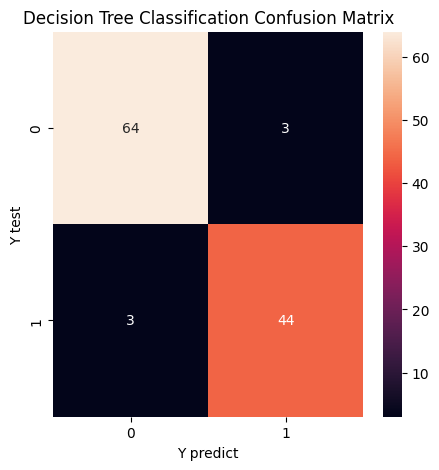

In [ ]:
#Confusion matrix
DecisionTree_CM = confusion_matrix(y_test, y_pred_tree)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(DecisionTree_CM, annot=True, ax=ax)
plt.title('Decision Tree Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        67
           1       0.94      0.94      0.94        47

    accuracy                           0.95       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



0.9456970466814862


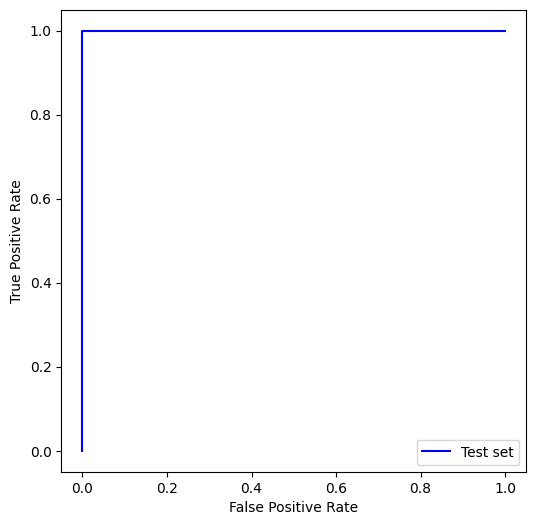

In [ ]:
analyze_roc(clf,x_train,y_train,x_test,y_test)

k nearest neighbour clasifier

In [ ]:
#k nearest neighbour clasifierrrrrrrrrrrrrr
# knn = KNeighborsClassifier(n_neighbors=3)
# knn.fit(x_train, y_train)
# y_pred = knn.predict(x_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)
# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error: {mse}")



# Define the hyperparameters to search over
param_grid = {'n_neighbors': [3, 5, 7, 9, 11,13], 'weights': ['uniform', 'distance'], 'p': [1, 2]}

# Create a KNN model
knn = KNeighborsClassifier()

# Perform a grid search over the hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Train the model using the best hyperparameters
best_knn_model = KNeighborsClassifier(**grid_search.best_params_)
best_knn_model.fit(x_train, y_train)

# Evaluate the model on the test set
y_pred_knn = best_knn_model.predict(x_test)
accuracy_knn = metrics.accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy_knn)
accuracy_dict["knn"] = accuracy_knn
mse = mean_squared_error(y_test, y_pred_knn)
print(f"Mean Squared Error: {mse}")

Best hyperparameters: {'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}
Accuracy: 0.956140350877193
Mean Squared Error: 0.043859649122807015


In [ ]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96        67
           1       0.98      0.91      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



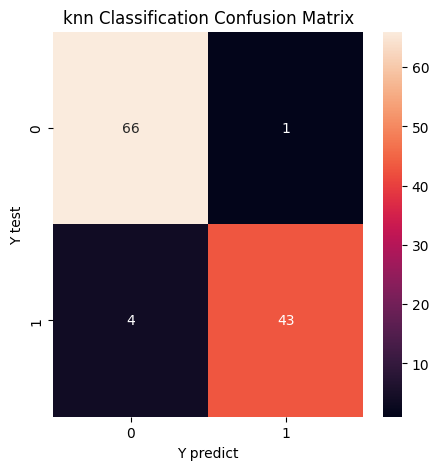

In [ ]:
knn_CM = confusion_matrix(y_test, y_pred_knn)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(knn_CM, annot=True, ax=ax)
plt.title('knn Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

0.9944426802159416


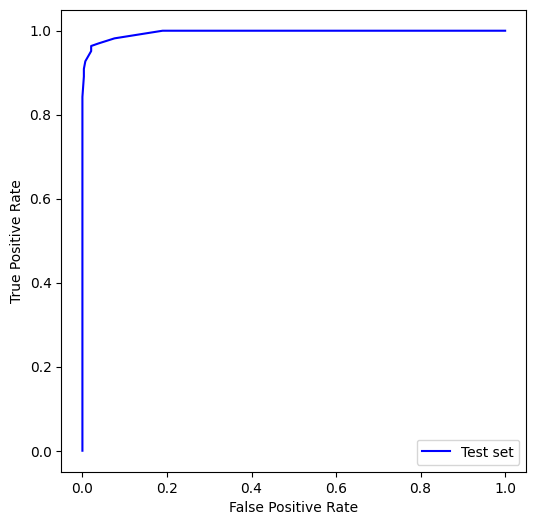

In [ ]:
analyze_roc(best_knn_model,x_train,y_train,x_test,y_test)

Random Forest Classifier


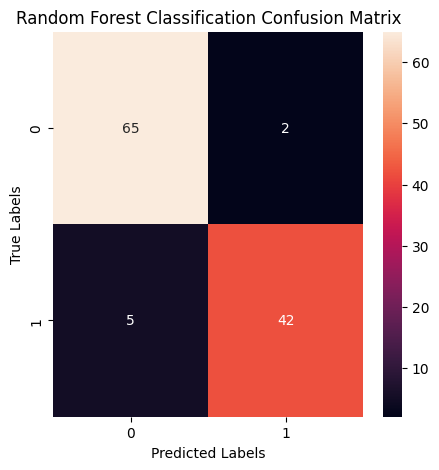

In [ ]:

# random_classifier=RandomForestClassifier(n_estimators=13,criterion='entropy',random_state=0)
# random_classifier.fit(x_train,y_train)
# y_pred_forest=random_classifier.predict(x_test)

# randomForest_CM = confusion_matrix(y_test, y_pred_forest)
# f, ax = plt.subplots(figsize=(5,5))
# sns.heatmap(randomForest_CM, annot=True, ax=ax)
# plt.title('Random Forest Classification Confusion Matrix')
# plt.xlabel('Y predict')
# plt.ylabel('Y test')
# plt.show()

# Define the hyperparameters for the random forest classifier
params = {'n_estimators': 13, 'criterion': 'entropy', 'max_depth': 3}

# Create a random forest classifier with the specified hyperparameters
random_classifier = RandomForestClassifier(**params, random_state=0)

# Train the classifier on the training data
random_classifier.fit(x_train, y_train)

# Predict the labels for the test data
y_pred_forest = random_classifier.predict(x_test)

# Compute the confusion matrix and plot it using seaborn
random_forest_cm = confusion_matrix(y_test, y_pred_forest)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(random_forest_cm, annot=True, ax=ax)
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

0.9930136551286122


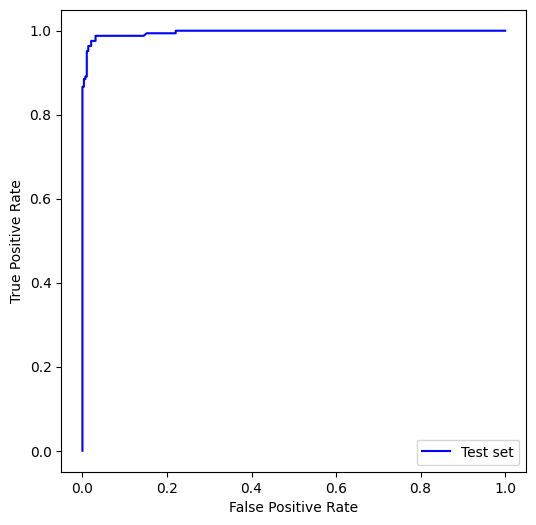

In [ ]:
analyze_roc(random_classifier,x_train,y_train,x_test,y_test)

In [ ]:
print(classification_report(y_test, y_pred_forest))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        67
           1       0.95      0.89      0.92        47

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



In [ ]:
accuracy_forest = accuracy_score(y_test, y_pred_forest)
accuracy_dict["forest"] = accuracy_forest
print("Accuracy:", accuracy_forest)
mse = mean_squared_error(y_test, y_pred_forest)
print(f"Mean Squared Error: {mse}")

Accuracy: 0.9385964912280702
Mean Squared Error: 0.06140350877192982


In [ ]:
accuracy_df = pd.DataFrame.from_dict(accuracy_dict, orient='index', columns=['Accuracy'])
print(accuracy_df.T)

          logistic  decision tree      knn    forest
Accuracy   0.95614       0.947368  0.95614  0.938596
